# **Strategy Project**
## **Regime-Based Beta Rotation (RBBR)**
*Steve Demirev*

*May 23rd 2025*



---

# **Paper Outline**
1. Strategy Overview
2. Hypotheses
3. Benchmarks, Constraints, and Objectives
4. Data Source
5. Model Overview
6. Indicator assessment
7. Signal assessment
8. Rules assessment
9. Parameter Optimization
10. Walk-Forward Analysis
11. Overfitting Assessment
12. Extension to research
13. References





---


# **Strategy Overview**


Historically, companies have tended to take on greater risk during periods of low interest rates. With borrowing costs reduced, firms can more affordably finance expansion, invest in new ventures, and scale operations, leading to heightened economic activity and increased market volatility. Conversely, during periods of high interest rates, companies often shift toward cost-cutting and risk aversion. As borrowing becomes more expensive, firms may scale back investments, delay expansion plans, and focus on maintaining liquidity and operational efficiency. This type of macroeconomic adjustment can be analogous to a game of musical chairs. During periods of low interest rates, or the "music playing" phase, companies move freely taking on risks and pursuing growth. However, when interest rates rise and the "music stops", firms scramble to secure stable financial footing. Those unable to adjust quickly may face insolvency or severe financial distress.

The Regime-Based Beta Rotation strategy seeks to capitalize on these macroeconomic cycles by adjusting equity exposure in response to the current interest rate environment. This strategy is grounded upon the assumption that investors and companies behave similarly during these periods, and increase their appetite for risk during periods of low interest rates, and conversely reduce their risk when rates are high. While this may not hold true for every company or investor, if the majority tend to respond to interest rate regimes in this nature, then this strategy may be able to capitalize on broad shifts of investor and market sentiment.

In order to quantify whether an investment is risky, the strategy calculates the rolling beta of a stock, defined as $\beta_{i,t} = \frac{Cov[R_{i,t}, R_{m,t}]}{Var[R_{m,t}]}$ where $\beta_{i,t}$ is the beta of stock $i$ at time $t$, $R_{i,t}$ is the return of stock $i$ over a rolling window ending at time $t$, $R_{m,t}$ is the return of the market, which will be proxied by \$SPY, over the same rolling window ending at time $t$. The numerator $Cov[R_{i,t},R_{m,t}]$ captures the degree to which the stock's returns and the market's returns move together, while the denominator $Var[R_{m,t}]$ captures the volatility of the market's returns. This metric will serve as an indicator of a stock's sensitivity to movements in the market, with higher betas suggesting greater relative risk, and lower betas indicating reduced risk and more stable returns.

While the core idea behind the strategy may seem intuitive, the difficulty is actually being able to define the difference between a "low" interest rate environment and a "high" one. Given that the Federal Funds Rate is the primary interest rate benchmark set by the Federal Reserve, we will use it as the indicator defining the current interest rate environment for this strategy. To classify interest rate regimes, we will be calculating the rolling median of the federal funds rate based on pre-determined window lengths and defining a "low" interest rate regime as any period in which the current federal funds rate is lower than the rolling median. Conversely, a "high" interest rate regime will be defined as one in which the current federal funds rate exceeds the rolling median.

Once each stock's rolling beta is computed and the current interest rate regime is classified, the strategy constructs an equally-weighted portfolio based on the interest rate classification. During low interest rate regimes, the strategy will compose a portfolio of 10 stocks that are constituents of the S&P 500 at the time of rebalancing with the highest rolling betas, reflecting the pursuit of higher returns and more risk during this risk-seeking period. Conversely, the portfolio will be composed of the 10 S&P 500 constituents with the lowest rolling betas during high interest rate regimes, emphasizing the shift to less volatile and more stable assets during these risk-averse periods. The selection process is dynamic and repeated at fixed rebalancing intervals, such as daily or monthly, while the portfolio is marked to market between these intervals to reflect ongoing valuation changes in our portfolio.

While selecting 10 stocks was chosen somewhat arbitrary, this parameter will remain fixed for the evaluation of this strategy for both practical and implementation related reasons. From a practical standpoint, while we want to capture more volatile stock price movements, we still want to diversify our risk to avoid potential black swan events where the asset we are currently holding falls drastically and hinders the strategies capabilities in the long term. From an implentation standpoint, we will be optimizing three other hyperparameters, the rolling beta window, the federal funds rate rolling window, and the rebalancing frequency. The rolling beta window will be evaluated at 6 different intervals ranging from 2 days to 1 year, while the federal funds rate will include 8 different intervals ranging between 1 year and 20 years, the rebalancing period will include 4 different intervals ranging from daily rebalancing to yearly rebalancing. Based on the current hyperparameter combinations, we will have 192 different hyperparameter configurations. Introducing a fourth parameter for portfolio sizing would further increase the number of combinations, increasing the computational time for grid search optimization and walk-forward analysis significantly. However, this additional hyperparameter could be a focus of additional research extension later on.

Following the steps detailed above, we will run a backtest of the RBBR strategy from the period of January 1st 2018 through May 23rd 2025, we will then evaluate the performance of this strategy against a buy and hold SPY benchmark, the best performing dynamic high beta only portfolio, and the best performing dynamic low beta only portfolio, using sharpe ratio, total return, and max drawdown as metrics.

Lastly, we incorporate a commission fee of \$0.0005 per share purchased to simulate real-world transaction costs, following the methodology used in "Can Day Trading Really Be Profitable?" by Carlo Zarattini and Andrew Aziz. For simplicity, slippage will not included in the current implementation, so the results may look better than they would realistically perform. While the goal is to keep this strategy as realistic as possible and avoid modeling biases, the current approach will include some degree of survivorship bias, as acquiring free data for many of the delisted tickers during this period has proven difficult. Due to this limitation, I strongly encourage any reader with access to a survivorship bias-free dataset to replicate the strategy using that data, as it would provide a more accurate assessment of its real-world performance.

In summary, the RBBR strategy offers a systematic framework for dynamically adjusting equity exposure in response to macroeconomic conditions. By leveraging the relationship between interest rate regimes and investor risk appetite, the strategy aims to improve risk-adjusted returns through targeted beta exposure. While certain assumptions and limitations, such as survivorship bias and the exclusion of slippage remain, the model provides a realistic foundation for testing regime-aware investment hypotheses. Future refinements could incorporate additional macro indicators, alternative beta definitions, or more complex position sizing techniques. The next section will present the hypotheses we will test for our strategy.

---
# **Hypotheses**

To test the validity of our strategy, we focus on four hypotheses, evaluated after identifying the optimal hyperparameters that maximize the strategy's Sharpe ratio:

### Hypothesis 1:
* H1: A regime based beta rotation strategy will produce higher risk-adjusted and total returns than a buy and hold S&P 500 (SPY) benchmark.

This hypothesis is useful to test because it directly addresses whether the added complexity of regime switching and dynamic beta exposure offers a tangible performance benefit over a simple passive investment strategy. The S&P 500 (SPY) serves as an appropriate benchmark, as the RBBR strategy selects a subset of S&P 500 constituents at each point in time based on their beta characteristics. If the RBBR strategy can outperform SPY on both total return and risk-adjusted bases (e.g, Sharpe ratio), it would demonstrate that incorporating macroeconomic context into portfolio construction provides a meaningful edge.

### Hypothesis 2:
* H2: The RBBR portfolio composed of the 10 highest beta stocks during low interest rate periods will outperform the S&P 500 benchmark over the same periods on both a risk-adjusted and total return basis.

This hypothesis is valuable because it isolates the performance of high beta exposure specifically within low rate, risk-seeking environments. If true, it would support the idea that investors are rewarded for taking on more volatility when capital is cheap and economic expansion is likely. This test helps validate the core premise of the strategy, that beta should be increased when macro conditions favor growth and risk appetite.

### Hypothesis 3:
* H3: The RBBR portfolio composed of the 10 lowest beta stocks during high interest rate periods will outperform the S&P 500 benchmark over the same periods on both a risk-adjusted and total return basis.

This hypothesis tests the defensive positioning aspect of the strategy during high rate, risk-averse environments. If a low beta portfolio can outperform SPY in such periods, it suggests that reducing exposure to market volatility offers not just protection but also a performance advantage when financial conditions tighten. Confirming this would reinforce the strategy's ability to adapt effectively in downturns or contractionary cycles.

### Hypothesis 4:
* H4: When optimally tuned, the RBBR strategy will outperform the optimal dynamic low beta portfolio in total return, the optimal dynamic high beta portfolio on volatility, and both on a risk-adjusted basis.

This hypothesis is important because it assesses the overall efficiency of the RBBR strategy relative to more simplistic dynamic alternatives. Rather than simply choosing high or low beta stocks at all times, RBBR adjusts exposure based on macroeconomic context. Outperforming both extremes across relevant dimensions (return, volatility, and Sharpe ratio) would demonstrate the value of a regime-aware, balanced approach.



---


# **Benchmarks, Constraints, and Objectives**


### Objectives
* Outperform the S&P 500 by dynamically adjusting equity exposure based on the prevailing interest rate regime.

* Adapt portfolio risk exposure according to macroeconomic conditions, increasing beta in low rate environments and reducing it in high rate regimes.

* Achieve a more balanced and efficient risk-return profile compared to static dynamic strategies, such as always-high or always-low beta exposure.

The primary objective of the RBBR strategy is to maximize risk-adjusted returns by adjusting exposure to high- and low-beta stocks according to interest rate regimes. The strategy seeks to outperform a passive S&P 500 portfolio by capturing upside in risk-seeking periods while limiting drawdowns during risk-averse periods. It also aims to provide greater portfolio efficiency than simpler beta-based strategies by incorporating macroeconomic context into asset selection and rotation decisions.

### Benchmarks
* Buy-and-Hold SPY Benchmark: A passive portfolio that holds only SPY throughout the entire backtesting period. This serves as the baseline for evaluating the overall performance of the RBBR strategy.

* Optimal Dynamic Low-Beta Portfolio: A portfolio that selects the 10 lowest rolling beta stocks at each rebalancing date, regardless of the interest rate regime. This benchmark reflects a risk-averse, volatility-minimizing strategy.

* Optimal Dynamic High-Beta Portfolio: A portfolio that selects the 10 highest rolling beta stocks at each rebalancing date, regardless of the interest rate regime. This benchmark represents a high-risk, high-volatility approach focused on aggressive market exposure.

These benchmarks allow us to evaluate the effectiveness of the RBBR strategy both against a passive market exposure on SPY and against dynamic beta strategies that lack regime awareness. If RBBR consistently outperforms these benchmarks on total return, volatility, and risk-adjusted metrics, it would suggest that incorporating macroeconomic regime classification adds value beyond static or naïvely dynamic approaches.


### Constraints
* Tested between January 1st 2018 and May 23rd 2025

* Transaction cost of $0.0005 per share

* Portfolio selection limited to S&P 500 constituents at each rebalancing date

* No short-selling or leverage

* Equally weighted positions

* Starting balance of \$25,000 USD

* Rebalancing frequency set by hyperparameter; portfolio marked to market daily

* Rolling betas and interest rate regimes computed using prior data only

These constraints are designed to reflect realistic trading conditions and ensure a strict methodology. Restricting portfolio selection to S&P 500 constituents at each rebalancing date ensures that only stocks available at that time are considered, mitigating survivorship and lookahead bias. Rolling betas and regime classifications are calculated using only historical data up to the rebalancing date, preserving the integrity of the backtest. Transaction costs of $0.0005 per share are applied to simulate real-world frictions associated with rebalancing. Positions are equally weighted and will be purchased using an initial capital balance of \$25,000 to avoid pattern day-trading restrictions. The strategy will avoid short-selling and leverage to maintain simplicity and eliminate exposure to margin-related risks. Rebalancing dates are determined by a hyperparameter, while daily mark-to-market tracking allows for accurate performance evaluation between trades.

### Limitations:
* Survivorship bias
* Limited regime periods
* Slippage
* Liquidity

While the strategy seeks to approximate real world conditions, there are certain conditions we could not incorporate into our model. The biggest limitation is occurs from our data, many stocks which were within the S&P 500 starting from January 1st 2018 ended up being delisted or had their tickers changed. Unfortunately I was unable to obtain access to the survivorship-bias free data from CRSP and from WRDS, and was limited in my opportunity of pursuing paid services for these datasets. I was able to source 539 of the 652 tickers that appeared as constituents of the S&P 500 within this period from yahoo finance's API, but the remaining 113 tickers I was unable to obtain data for which introduced survivorship bias to this model.

Another limitation is the time period chosen, ideally the strategy should be tested on a longer time horizon to better capture a wider variety of macroeconomic and interest rate cycles. The current time period does include a few different macroeconomic regimes such as the 2020 covid crash, the 2021 stimulus, and the 2022 rate hikes, but remains narrow in scope and wouldn't provide extremely robust results.

The other two limitations relate to market microstructure. While it is reasonable to assume that S&P 500 constituents generally offer sufficient liquidity for most trades, this assumption cannot be verified without access to detailed order book data. As a result, the model does not account for potential liquidity constraints or slippage that may occur when executing trades, particularly during periods of heightened volatility or low market depth. Although this omission slightly degrades the realism of the backtest, its impact is likely less significant than the other two limitations we have previously mentioned.



---


# **Data Source**

To evaluate the RBBR strategy, three categories of data were required:

1. S&P 500 Constituents: Daily index membership data for each trading day between January 1, 2018, and May 23, 2025, to ensure historical accuracy when constructing portfolios.

2. Federal Funds Rate: Daily effective federal funds rate data beginning at least 20 years prior to January 1, 2018, to support rolling median calculations for interest rate regime classification.

3. Equity Price Data: Daily open, high, low, and close (OHLC) price data for all S&P 500 constituents that appeared in the index during the evaluation period, with historical price coverage beginning no later than one trading year prior to January 1, 2018, to accommodate rolling beta initialization.

Thanks to a classmate, Maxwell Black, who had referred me to a github repository which had scraped the data for the S&P 500 constituents from wikipedia from each day from 1996 to present day: https://github.com/hanshof/sp500_constituents. I would also like to thank the owner of the repository and to those who have maintained and curated this data, as it was also difficult to source without their efforts.

The federal funds rate data was sourced from the Federal Reserve Economic Data (FRED) platform. Although the download range extends from January 1, 1900 to the present, the actual dataset begins later; downloading the full range ensures the entire available history is captured and can be filtered 20 years prior to the strategy's start date to properly apply the rolling median initialization: https://fred.stlouisfed.org/series/FEDFUNDS.

Lastly, the equity price data was sourced from Yahoo Finance. As noted in the previous section, many S&P 500 constituents were delisted or experienced ticker changes during the backtesting period. Unfortunately, Yahoo Finance does not provide historical data for delisted stocks through its free API, which limits the completeness of the dataset. As a result, only stocks with accessible price data during the full evaluation window could be included, introducing survivorship bias into the backtest.

Below is the code used to download the required price data from Yahoo Finance. The list of S&P 500 constituents was used to determine which tickers needed to be retrieved.

```
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import requests
import os

## Parameters:
# Define Start/End Dates(2018-2025)
start_date = pd.to_datetime("2018-01-01")
end_date = pd.to_datetime("2025-05-24")

# Get data up to 1 year before
data_start_date = (pd.to_datetime(start_date) - pd.DateOffset(years = 1) - pd.Timedelta(days = 3)).strftime("%Y-%m-%d")


def get_components(start_date, end_date):
   # Importing Data to df
    url = "https://raw.githubusercontent.com/stevedemirev/CFRM523FinalProjectData/refs/heads/main/sp_500_historical_components.csv"
    sp500_components = pd.read_csv(url)
    
    # Convert to datetime
    sp500_components['date'] = pd.to_datetime(sp500_components['date'])
    
    # Filter data to start dates
    sp500_components = sp500_components[(sp500_components['date'] >= start_date) & (sp500_components['date'] <= end_date)]
    
    # Loop through each day and save S&P 500 components by date
    sp500_dictionary = {}
    entries = len(sp500_components)
    for i in range(entries):
        date = sp500_components['date'].iloc[i]
        tickers_str = sp500_components['tickers'].iloc[i]
        tickers = [t.replace(".", "-") for t in tickers_str.split(",")]
        sp500_dictionary[date] = tickers

    # Get data for every ticker
    all_tickers = set()
    for tickers in sp500_dictionary.values():
        all_tickers.update(tickers)
        
    all_tickers = sorted(list(all_tickers))

    return all_tickers, sp500_dictionary

all_tickers, sp500_daily_components = get_components(start_date, end_date)

all_data = pd.DataFrame()
all_tickers.append("SPY")
for ticker in all_tickers:
    try:
        df = yf.download(
            ticker,
            start=data_start_date,
            end=end_date,
            progress=False,
            auto_adjust=False
        )[["Adj Close"]]
        df.columns = [ticker]
        all_data = pd.concat([all_data, df], axis=1)

    except Exception as e:
        print(f"Error for {ticker}: {e}")
        continue

# Drop columns which are NA as they will mess up returns
all_data = all_data.dropna(axis=1, how="any")
all_data.to_csv("/home/steve/Downloads/CFRM_523/FinalProject/yfinance_price_data.csv")

print(f"Total number of tickers in constituent list: {len(set(all_tickers))}")
# Compare ticker coverage
mis = set(all_data.columns)
missing = set(all_tickers) - mis
print(f"Data retrieved for {len(mis)} tickers")
print(f"Missing {len(missing)} tickers")
```

To simplify the process, both the downloaded price data and the S&P 500 constituents csv have been uploaded into a separate github repository to read from: https://github.com/stevedemirev/CFRM523FinalProjectData. This allows the code to save time by read directly from the github repository rather than redownloading it each time.





---


# **Model Overview**

To begin implementing and backtesting the strategy, the first step is to define the backtesting start and end dates, which establish the time frame over which performance will be evaluated. The evaluation period begins on January 1, 2018, with the strategy implementation starting on January 2 2018 (the first trading day of the year) and runs through end of day May 23, 2025.

Following this, we define a dictionary of the hyperparameters covering the following configurations:

Beta Windows:
* 2 Days
* 1 Week
* 1 Month
* 3 Months
* 6 Months
* 1 Year

Federal Funds Rate Windows:
* 1 Year
* 2 Years
* 3 Years
* 4 Years
* 5 Years
* 10 Years
* 15 Years
* 20 Years

Rebalancing Periods:
* Daily
* Weekly
* Monthly
* Yearly

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import requests
import itertools
import os
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from collections import OrderedDict
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


## Parameters:
# Define Start/End Dates(2018-2025)
start_date = pd.to_datetime("2018-01-01").normalize()
end_date = pd.to_datetime("2025-05-24").normalize()

# Windows for beta calculations
beta_windows = {
    '2d': 2,
    '1w': 5,
    '1m': 21,
    '3m': 63,
    '6m': 126,
    '1y': 252
}

# Windows for FFR median calculations
FFR_windows = {
    '1y': 365,
    '2y': 365*2,
    "3y": 365*3,
    '4y': 365*4,
    '5y': 365*5,
    '10y': 3650,
    '15y': 365*15,
    '20y': 365*20
}

# Rebalancing periods
rebalancing = {
    "daily": 1,
    "weekly": 5,
    "monthly": 21,
    "yearly": 252
}

The next step would be to create our `DataLoader` class, which is responsible for retrieving, processing, and organizing the data required for the strategy. This class encapsulates three core functions:

* `load_components()`: This function is used to obtain the S&P 500 constituents data from the preproccessed github CSV, clean it, then forward-fill missing dates using the most recent entry to ensure we could look up the current components for any given trading day within the backtesting period.

* `load_prices()`: This function is responsible for retrieving the adjusted close price data from the yahoo finance price data csv and preparing it for downstream beta calculations.

* `load_ffr()`: This function downloads the federal funds rate data from FRED and transforms the monthly observations into a forward-filled daily time series. Each date is then classified into a "high" or "low" regime based on whether the current federal funds rate is above or below its rolling median over a specified window. Additionally, the interest rate trend is calculated using the year-over-year rate change. This information is compiled into a DataFrame and stored in a dictionary, with each key corresponding to a specific federal funds rate window. This structure allows the strategy to efficiently retrieve the applicable regime classification for any given day during the backtesting period.



In [2]:
class DataLoader:
    def __init__(self, start_date, end_date):
        self.start_date = start_date
        self.end_date = end_date
        self.components = None
        self.all_tickers = None
        self.FFR_df = None
        self.prices = None

    def load_components(self):
        # Importing Data to df
        url = "https://raw.githubusercontent.com/stevedemirev/CFRM523FinalProjectData/refs/heads/main/sp_500_historical_components.csv"
        sp500_components = pd.read_csv(url)

        # Convert to datetime
        sp500_components['date'] = pd.to_datetime(sp500_components['date']).dt.normalize()

        # Loop through each day and save S&P 500 components by date
        sp500_dictionary = {}
        for _, row in sp500_components.iterrows():
            date = row['date']
            tickers = [t.replace(".", "-").upper() for t in row['tickers'].split(",")]
            sp500_dictionary[date] = tickers

        # Forward fill missing dates with most recent dates
        first_date = sp500_components['date'].min().normalize()
        full_dates = pd.date_range(start = first_date, end=self.end_date, freq="D")
        sp500_complete = {}
        most_recent = None
        for d in full_dates:
            if d in sp500_dictionary:
                most_recent = sp500_dictionary[d]
            if most_recent is not None:
                sp500_complete[d] = most_recent

        # Filter here between start date and end date
        sp500_complete = {
            date: tickers for date, tickers in sp500_complete.items()
            if self.start_date <= date <= self.end_date
        }
        self.components = sp500_complete
        # Get data for every ticker
        self.all_tickers = sorted(set(
            ticker for tickers in sp500_complete.values() for ticker in tickers
        ))

        #print(sp500_components['date'])
        #print(sp500_components['date'].dtype)

        return self.all_tickers, self.components

    def load_prices(self):
        #Import data
        url = "https://raw.githubusercontent.com/stevedemirev/CFRM523FinalProjectData/refs/heads/main/yfinance_price_data.csv"
        data = pd.read_csv(url)

        #print(data)
        data['date'] = pd.to_datetime(data['Date'], errors='coerce')
        data.set_index('date', inplace=True)
        data.index = data.index.normalize()

        if 'Date' in data.columns:
            data.drop(columns=['Date'], inplace=True)

        self.prices = data
        return self.prices

    def load_ffr(self, windows):
        ffr_symbol = 'FEDFUNDS'
        ffr = web.DataReader(ffr_symbol, 'fred', "1900-01-01", self.end_date)
        full_daily_index = pd.date_range(start=ffr.index.min(), end=ffr.index.max(), freq='D')

        ffr_daily = ffr.reindex(full_daily_index).ffill()
        ffr_daily.index = pd.to_datetime(ffr_daily.index).normalize()
        ffr_daily.index.name = 'date'
        FFR = ffr_daily['FEDFUNDS']
        #print(ffr_daily.head())

        self.FFR_df = self.load_ffr_regimes(FFR, windows)
        return self.FFR_df

    def load_ffr_regimes(self, FFR, windows):
        def classify_trend(change):
            if pd.isna(change):
                return None
            elif change > 0:
                return 'rising'
            elif change < 0:
                return 'falling'
            else:
                return 'flat'

        ffr = FFR.copy()
        rate_change = ffr - ffr.shift(365)
        trend = rate_change.apply(classify_trend)

        rolling_medians = {}
        for label, window in windows.items():
            rolling_median = ffr.rolling(window=window, min_periods=  window).median()
            regime = (ffr < rolling_median).map(lambda x: 'low' if x else 'high')

            df = pd.DataFrame({
                'FEDFUNDS': ffr,
                'rolling_median': rolling_median,
                'regime': regime,
                '1_year_rate_change': rate_change,
                'trend': trend
            })

            df = df.loc[df.index >= self.start_date]
            df = df.reindex(pd.date_range(start = self.start_date, end=self.end_date, freq = "D")).ffill()

            rolling_medians[label] = df

        return rolling_medians

The next step is to calculate the rolling betas for each stock in the prices dataframe relative to SPY. To accomplish this we define the `BetaCalculator` class.

* `compute_rolling_betas`: This function first computes the daily returns for each ticker along with returns of SPY. For each rolling window, it then computes the rolling beta of each stock through the formula: $\beta_{i,t} = \frac{Cov[R_{i,t}, R_{m,t}]}{Var[R_{m,t}]}$ where $R_{i,t}$ is the return of stock $i$ at time $t$ and $R_{m,t}$ is the return of SPY at time $t$ . The resulting dataframes are then saved and stored in a dictionary, where each key corresponds to a different window length. This structure allows the backtesting framework to easily access beta estimates at various lookback windows.

In [3]:
class BetaCalculator:
    def __init__(self, prices, benchmark = "SPY"):
        self.prices  = prices
        self.benchmark = benchmark.upper()
        self.returns = self.prices.pct_change().dropna()
        self.market_returns = self.returns[self.benchmark]
        self.betas_df = None

    def compute_rolling_betas(self, windows):
        rolling_betas = {}

        for label, window in windows.items():
            betas = pd.DataFrame(index = self.returns.index, columns = [col for col in self.returns.columns if col != self.benchmark])
            for ticker in betas.columns:
                cov = self.returns[ticker].rolling(window).cov(self.market_returns)
                var = self.market_returns.rolling(window).var()
                betas[ticker] = cov/var

            betas = betas.dropna(axis=1, how='all').dropna(axis=0, how='all')
            # Shift by 1 to avoid look-ahead bias
            betas = betas.shift(1).dropna()
            betas = betas[betas.index >= start_date]

            rolling_betas[label] = betas

        self.betas_df = rolling_betas
        return self.betas_df

Next, we want to implement the core logic for the backtester. The logic for the RBBR strategy should go as follows:

1. Iterate through each trading day in the beta values DataFrame.

2. Retrieve price data for the current day.

3. If a portfolio is already active from a previous day, calculate its current value using mark-to-market accounting based on the day's prices.

4. If the current day is a rebalancing day, determine the prevailing interest rate regime (either "low" or "high").

5. Filter the current day's beta values to include only those tickers that are constituents of the S&P 500 on that date.

6. Select the top 10 highest beta stocks if the regime is classified as "low," or the 10 lowest beta stocks if it is "high."

7. Allocate capital equally across the selected stocks, compute the number of shares to purchase, and subtract transaction costs based on a per-share commission rate.

8. Repeat this process for each trading day until the end of the evaluation period.

The logic for the dynamic high-beta-only and low-beta-only portfolios is similar, but skips regime classification and stock selection logic (Step 6), since the portfolio remains fixed to either high- or low-beta stocks selected at the start.

For the SPY buy-and-hold benchmark, the strategy simply purchases SPY shares on the first valid trading day, deducts the commission cost, and marks the portfolio to market for the remainder of the evaluation period.

In [4]:
class Backtester:
    def __init__(self, data_loader, beta_calculator):
        self.data_loader = data_loader
        self.beta_calculator = beta_calculator
        self.prices = data_loader.prices
        self.sp500_comp = data_loader.components
        self.ffr_df = data_loader.FFR_df
        self.betas_df = beta_calculator.betas_df
        self.INITIAL_BALANCE = 25_000
        self.COMMISSIONS_PER_SHARE = 0.0005

    def run_dynamic_strategy(self, beta_window, regime_window,
                             rebal_freq, start_date, end_date = pd.Timestamp("2025-05-24").normalize()):
        beta_df = self.betas_df[beta_window]
        beta_df = beta_df[(beta_df.index >= start_date) & (beta_df.index <= end_date)]

        ffr = self.ffr_df[regime_window]
        ffr = ffr[(ffr.index >= start_date) & (ffr.index <= end_date)]

        rebalance_days = beta_df.index[::rebalancing[rebal_freq]]

        portfolio_value = self.INITIAL_BALANCE
        current_shares = None
        current_tickers = None
        last_selected = {}
        history = []

        first_trade = True
        for t in beta_df.index:
            t = pd.to_datetime(t).normalize()
            #print(t)
            #print(f"beta: {t in beta_df.index}")
            #print("ffr", t in ffr.index)
            #print("sp500",t in sp500_comp)

            if ((t not in beta_df.index) or (t not in ffr.index) or
            (t not in self.sp500_comp) or (t not in self.prices.index)):
                print(f"Date Not in Data")
                continue

            prices_today = self.prices.loc[t]
            # Mark-to-market previous day
            if current_shares is not None and current_tickers is not None:
              portfolio_value = (current_shares.values * prices_today[current_tickers].values).sum()

              history.append({
                  'Date': t,
                  'Portfolio Value': round(portfolio_value, 2),
                  'PnL': round(portfolio_value - self.INITIAL_BALANCE, 2),
                  **last_selected
              })

            if t in rebalance_days:
              regime = ffr.loc[t, "regime"]
              trend = ffr.loc[t, "trend"]
              beta_row = beta_df.loc[t]
              tickers = self.sp500_comp[t]
              valid_tickers = beta_row[[tk for tk in tickers if tk in beta_row and tk in self.prices.columns]].dropna()

              if len(valid_tickers) < 10:
                print(f"Not enough tickers to build a portfolio for day: {t}")
                continue

              selected = valid_tickers.nlargest(10) if regime == "low" else valid_tickers.nsmallest(10)
              selected_tickers = sorted(selected.index.tolist())
              ticker_prices = prices_today[selected_tickers]

              capital_per_stock = portfolio_value/len(selected_tickers)
              shares = capital_per_stock / ticker_prices
              commission = (shares * self.COMMISSIONS_PER_SHARE).sum()
              portfolio_value = (shares * ticker_prices).sum() - commission

              current_shares = shares
              current_tickers = selected_tickers
              last_selected = {
                'Portfolio Components': selected_tickers,
                'Average Beta': selected.mean(),
                'Minimum Beta': selected.min(),
                'Maximum Beta': selected.max(),
                'Regime': regime,
                'Trend': trend
              }

              if first_trade:
                first_trade = False
                history.append({
                  'Date': t,
                  'Portfolio Value': round(portfolio_value, 2),
                  'PnL': round(portfolio_value - self.INITIAL_BALANCE, 2),
                  **last_selected
                })
        df = pd.DataFrame(history).set_index('Date')
        df['Return'] = df['Portfolio Value'].pct_change()
        df['Cumulative Return'] = df['Portfolio Value'] / df['Portfolio Value'].iloc[0] - 1

        group_map = {
            'daily': df.index,
            'weekly': df.index.to_period('W'),
            'monthly': df.index.to_period('M'),
            'yearly': df.index.to_period('Y')
        }

        summary_table = df.groupby(group_map[rebal_freq]).agg({
        'Portfolio Value': 'last',
        'PnL': 'last',
        'Return': 'last',
        'Cumulative Return': 'last',
        'Regime': 'first',
        'Trend': 'first',
        'Average Beta': 'first',
        'Minimum Beta': 'first',
        'Maximum Beta': 'first',
        'Portfolio Components': 'first'
        })

        total_return = df['Return'].add(1).groupby(group_map[rebal_freq]).prod().sub(1)
        summary_table['Return'] = total_return
        return df, summary_table

    def run_static_strategy(self, beta_window, rebal_freq, start_date, high_beta = True):
        beta_df = self.betas_df[beta_window]
        #print(beta_df)
        start_date = pd.to_datetime(start_date).normalize()
        rebalance_days = beta_df.index[::rebalancing[rebal_freq]]

        portfolio_value = self.INITIAL_BALANCE
        current_shares = None
        current_tickers = None
        last_selected = {}
        history = []

        first_trade = True
        for t in beta_df.index:
            t = pd.to_datetime(t).normalize()
            if ((t not in beta_df.index)or (t not in self.sp500_comp)
            or (t not in self.prices.index)):
                print(f"Date Not in Data")
                continue

            prices_today = self.prices.loc[t]

            # Mark-to-market previous day
            if current_shares is not None and current_tickers is not None:
              portfolio_value = (current_shares.values * prices_today[current_tickers].values).sum()

              history.append({
                  'Date': t,
                  'Portfolio Value': round(portfolio_value, 2),
                  'PnL': round(portfolio_value - self.INITIAL_BALANCE, 2),
                  'Portfolio Type': "High Beta" if high_beta else "Low Beta",
                  'Portfolio Components': current_tickers,
                  **last_selected
              })

            if t in rebalance_days:
              beta_row = beta_df.loc[t]
              tickers = self.sp500_comp[t]
              valid_tickers = beta_row[[tk for tk in tickers if tk in beta_row and tk in self.prices.columns]].dropna()

              if len(valid_tickers) < 10:
                print(f"Not enough tickers to build a portfolio for day: {t}")
                continue

              selected = valid_tickers.nlargest(10) if high_beta else valid_tickers.nsmallest(10)
              selected_tickers = sorted(selected.index.tolist())
              ticker_prices = prices_today[selected_tickers]

              capital_per_stock = portfolio_value/len(selected_tickers)
              shares = capital_per_stock / ticker_prices
              commission = (shares * self.COMMISSIONS_PER_SHARE).sum()
              portfolio_value = (shares * ticker_prices).sum() - commission

              current_shares = shares
              current_tickers = selected_tickers
              last_selected = {
                'Portfolio Components': selected_tickers,
                'Average Beta': selected.mean(),
                'Minimum Beta': selected.min(),
                'Maximum Beta': selected.max()
              }

              if first_trade:
                first_trade = False
                history.append({
                  'Date': t,
                  'Portfolio Value': round(portfolio_value, 2),
                  'PnL': round(portfolio_value - self.INITIAL_BALANCE, 2),
                  **last_selected
              })

        df = pd.DataFrame(history).set_index('Date')
        df['Return'] = df['Portfolio Value'].pct_change()
        df['Cumulative Return'] = (df['Portfolio Value'] / df['Portfolio Value'].iloc[0])-1

        group_map = {
            'daily': df.index,
            'weekly': df.index.to_period('W'),
            'monthly': df.index.to_period('M'),
            'yearly': df.index.to_period('Y')
        }

        summary_table = df.groupby(group_map[rebal_freq]).agg({
        'Portfolio Value': 'last',
        'PnL': 'last',
        'Return': 'last',
        'Cumulative Return': 'last',
        'Average Beta': 'first',
        'Minimum Beta': 'first',
        'Maximum Beta': 'first',
        'Portfolio Components': 'first'
        })

        total_return = df['Return'].add(1).groupby(group_map[rebal_freq]).prod().sub(1)
        summary_table['Return'] = total_return
        return df, summary_table

    def run_sp500_bnh(self, start_date, ticker = "SPY"):
        start_date = pd.to_datetime(start_date).normalize()
        prices = self.prices[[ticker]].dropna()

        if start_date not in prices.index:
            idx = prices.index.get_indexer([start_date], method='bfill')[0]
            trade_date = prices.index[idx]
        else:
            trade_date = start_date

        prices = prices[prices.index >= trade_date]
        #print(prices)

        portfolio_value = self.INITIAL_BALANCE
        history = []

        first_trade = True
        for t in prices.index:
          price_today = prices.loc[t, ticker]

          if first_trade:
            shares = portfolio_value/ price_today
            commissions = shares * self.COMMISSIONS_PER_SHARE
            portfolio_value = (shares*price_today) - commissions
            first_trade = False

          else:
            portfolio_value = (shares * price_today)

          history.append({
              'Date': t,
              'Portfolio Value': round(portfolio_value,2),
              'Benchmark': ticker,
              'PnL': round(portfolio_value - self.INITIAL_BALANCE, 2)
          })

        df = pd.DataFrame(history).set_index('Date')
        df['Return'] = df['Portfolio Value'].pct_change()
        df['Cumulative Return'] = (df['Portfolio Value'] / df['Portfolio Value'].iloc[0])-1
        return df

### Initialize classes and load all data
loader = DataLoader(start_date, end_date)
all_tickers, sp500_components = loader.load_components()
prices = loader.load_prices()
FFR_df = loader.load_ffr(FFR_windows)

beta_calc = BetaCalculator(prices)
beta_df = beta_calc.compute_rolling_betas(beta_windows)

# Not necessary but just in case
loader.prices = prices[(prices.index >= start_date) & (prices.index <= end_date)]

bt = Backtester(loader, beta_calc)

Lastly, we want to evaluate the performance for each strategy configuration, to do this we define a `PeformanceEvaluator` class. This class is responsible for calculating key portfolio performance metrics based on the results from the backtester and convert it into a clean dataframe for better visualization.

Some of the key metrics calculated here are:
* Cumulative Return: The total return over the evaluation period
* Annualized Return: The compounded return normalized to a yearly basis
* Annualized Volatility: The standard deviation of returns, annualized by a trading year (252 days)
* Sharpe Ratio: The risk-adjusted return, calculated as the average portfolio return divided by the portfolio volatility (risk-free rate of 0)
* Maximum Drawdown: The largest observed decline from peak to trough of the portfolio's value
* Maximum Drawdown Duration: The length of the longest drawdown period, additionally included the start date and end dates of the drawdown period.



In [5]:
class PerformanceEvaluator:
    def __init__(self, df, rf = 0,
                 beta_window = None, ffr_window = None, rebal_freq = None, strat_type = None):
      self.df = df.copy()
      self.beta_window = beta_window
      self.ffr_window = ffr_window
      self.rebal_freq = rebal_freq
      self.strat = strat_type
      self.rf = float(rf)
      self.clean_data()

    def clean_data(self):
      self.df = self.df.dropna(subset = ['Return'])

    def get_cumulative_return(self):
      return self.df['Cumulative Return'].iloc[-1]

    def get_annualized_return(self):
      start_bal = self.df['Portfolio Value'].iloc[0]
      end_bal = self.df['Portfolio Value'].iloc[-1]
      total_return = (end_bal / start_bal) - 1
      n_days = len(self.df)
      annualized_return = (1+total_return)**(252/n_days) - 1
      return annualized_return

    def get_volatility(self):
        return self.df['Return'].std() * np.sqrt(252)

    def get_sharpe(self):
        mean_ret = self.df['Return'].mean()
        std_ret = self.df['Return'].std()
        daily_rf = self.rf/252
        return ((mean_ret - daily_rf)/std_ret) * np.sqrt(252)

    def get_max_drawdown(self):
        equity_curve = self.df['Portfolio Value']
        max_equity = np.maximum.accumulate(equity_curve)
        drawdown = (equity_curve - max_equity)/ max_equity
        max_drawdown = np.min(drawdown)
        return -max_drawdown

    def get_max_dd_duration(self):
        equity_curve = self.df['Portfolio Value']
        rolling_max = equity_curve.cummax()
        in_drawdown = equity_curve < rolling_max

        max_duration = 0
        curr_duration = 0
        start_idx = None
        dd_start_idx = None
        dd_end_idx = None

        for i, is_dd in enumerate(in_drawdown):
            if is_dd:
              if curr_duration == 0:
                start_idx = i
              curr_duration+=1
              if curr_duration > max_duration:
                max_duration = curr_duration
                dd_start_idx = start_idx
                dd_end_idx = i
            else:
                curr_duration = 0
        if dd_start_idx is not None and dd_end_idx is not None:
          dd_start = in_drawdown.index[dd_start_idx]
          dd_end = in_drawdown.index[dd_end_idx]
        return max_duration, dd_start, dd_end # In trading days

    def get_strat_stats(self):
        data = OrderedDict()

        if self.beta_window is not None:
          data['Beta Window'] = self.beta_window
        if self.ffr_window is not None:
          data['FFR Window'] = self.ffr_window
        if self.rebal_freq is not None:
          data['Rebalancing'] = self.rebal_freq
        if self.strat == "RBBR":
          data['Strategy Type'] = "RBBR"
        elif self.strat == "Low":
            data['Strategy Type'] = "Dynamic Low Beta"
        elif self.strat == "High":
            data['Strategy Type'] = "Dynamic High Beta"
        elif self.strat == "BnH":
            data['Strategy Type'] = "SPY Buy & Hold"

        data['Cumulative Return(%)'] = self.get_cumulative_return()
        data['Annualized Return(%)'] = self.get_annualized_return()
        data['Annualized Volatility(%)'] = self.get_volatility()
        data['Annualized Sharpe Ratio'] = round(self.get_sharpe(), 2)
        data['Max Drawdown(%)'] = self.get_max_drawdown()
        duration, dd_start, dd_end = self.get_max_dd_duration()
        data['Max DD Duration'] = duration
        data['Max DD Start'] = dd_start
        data['Max DD End'] = dd_end

        return pd.DataFrame([data])

    def format_summary_table(self, df):
      df_formatted = df.copy()
      percent_cols = [
        'Cumulative Return(%)',
        'Annualized Return(%)',
        'Annualized Volatility(%)',
        'Max Drawdown(%)'
      ]

      for col in percent_cols:
        if col in df_formatted.columns:
            df_formatted[col] = df_formatted[col].apply(lambda x: f"{x * 100:.2f}%")
      if 'Annualized Sharpe Ratio' in df_formatted.columns:
        df_formatted['Annualized Sharpe Ratio'] = df_formatted['Annualized Sharpe Ratio'].round(2)

      if 'Max DD Duration' in df_formatted.columns:
          df_formatted['Max DD Duration'] = df_formatted['Max DD Duration'].astype(str) + " trading days"

      if 'Max DD Start' in df_formatted.columns:
          df_formatted['Max DD Start'] = df_formatted['Max DD Start']

      if 'Max DD End' in df_formatted.columns:
          df_formatted['Max DD End'] = df_formatted['Max DD End']

      return df_formatted

---

# **Indicator assessments**

The RBBR strategy utilizes two primary indicators:

1. The rolling beta, which captures each stock's sensitivity to market movements

2. The regime classifier which identifies the current interest rate environment based on the rolling median of the federal funds rate

## Rolling Beta Assessment
To validate the usefulness of rolling beta as a standalone indicator, we want to test the indicator without introducing the full strategy logic yet. The goal here will be to deterime whether rolling beta is a good proxy for determining whether a stock is riskier based on its expected return and volatility, both during low interest rate regimes and in general. To confirm or deny this, we will test two key hypotheses:

1. Stocks with higher rolling betas should on average exhibit higher volatility across the full sample period.

2. Stocks with higher rolling betas should exhibit higher volatility and higher expected returns across low interest rate regimes.

To ensure consistency across our evaluations, we use a fixed set of hyperparameters when testing the rolling beta indicator. The rolling beta window is set to 3 months (63 trading days), the federal funds rate rolling median window is set to 10 years (3650 trading days), and rebalancing occurs on a monthly basis (every 21 trading days).

### Test 1: Higher rolling betas exhibit higher volatility

In [6]:
beta_w = "3m"
ffr_w = "10y"
rebal_f = "monthly"

def test_volatility(beta_df, returns, rebal_f):
    vol_results = []
    bin_cutoffs = []

    for date in beta_df.index[::rebal_f]:
      beta_today = beta_df.loc[date]

      future_vol = returns.loc[date:].iloc[1:rebal_f+1].std()

      df = pd.DataFrame({'beta': beta_today, 'volatility': future_vol})
      df = df.dropna().copy()

      group_labels, bins = pd.qcut(df['beta'], 5, labels=False,
                                   retbins=True, duplicates='drop')

      df.loc[:, 'beta_group'] = group_labels
      avg_vol = df.groupby('beta_group')['volatility'].mean()

      vol_results.append(avg_vol)
      bin_cutoffs.append(bins)

    vol_df = pd.DataFrame(vol_results)
    avg_group_vol = vol_df.mean()

    bin_df = pd.DataFrame(bin_cutoffs, columns=[f'Cutoff_{i}' for i in range(len(bins))])
    bin_df.index = beta_df.index[:len(bin_df)]

    return avg_group_vol, bin_df

beta_groups_vol, beta_cutoff_df = test_volatility(beta_df[beta_w], beta_calc.returns, rebalancing[rebal_f])

avg_cutoffs = beta_cutoff_df.mean()
beta_group_labels = []
for i in range(len(avg_cutoffs) - 1):
    lower = avg_cutoffs.iloc[i]
    upper = avg_cutoffs.iloc[i + 1]
    label = f"[{lower:.3f}, {upper:.3f})"
    beta_group_labels.append(label)


beta_summary = pd.DataFrame({
    'Beta Range': beta_group_labels,
    'Avg Volatility': beta_groups_vol.values
})
beta_summary.index.name = "Beta Group"

display(beta_summary)

,Beta Range,Avg Volatility
Beta Group,,
0,"[-0.379, 0.560)",0.015419
1,"[0.560, 0.825)",0.017315
2,"[0.825, 1.044)",0.018621
3,"[1.044, 1.322)",0.020828
4,"[1.322, 2.961)",0.026473


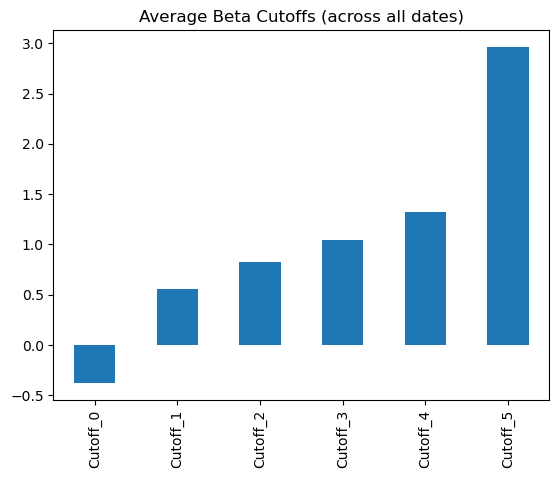

In [7]:
beta_cutoff_df.mean().plot(kind='bar', title="Average Beta Cutoffs (across all dates)");

To test whether higher-beta stocks exhibit greater volatility, we use the 3-month rolling beta estimates from our beta DataFrame. At each monthly rebalancing point (every 21 trading days), we group stocks into five quintiles based on their beta values. We then calculate the forward-looking realized volatility for each stock over the next 21 trading days and compute the average volatility within each beta group.

This process is repeated over the full time period, and the results are aggregated to obtain the average volatility for each beta group across all rebalancing dates.

The final results show a clear upward trend: as beta increases, so does the average volatility within that group. This confirms our hypothesis that higher rolling betas are associated with more volatile returns, supporting the use of beta as a proxy for relative risk.

### Test 2: Higher beta stocks exhibit higher expected returns and volatility during low interest rate regimes

In [8]:
# Pass in regime type to see how returns/vol did during that regime
def test_returns(beta_df, returns, ffr, regime_type, rebal_freq=21):
    results = []
    bin_cutoffs = []

    for date in beta_df.index[::rebal_freq]:
        if ffr.loc[date, "regime"] != regime_type:
            continue

        beta_today = beta_df.loc[date]
        future_returns = returns.loc[date:].iloc[1:rebal_freq+1].sum()
        future_vol = returns.loc[date:].iloc[1:rebal_freq+1].std()

        df = pd.DataFrame({
            'beta': beta_today,
            'expected_return': future_returns,
            'future_volatility': future_vol
        }).dropna().copy()

        labels, bins = pd.qcut(df['beta'], 5, labels=False,
                               retbins=True, duplicates='drop')

        df['beta_group'] = labels

        avg_stats = df.groupby('beta_group').agg({
            'expected_return': 'mean',
            'future_volatility': 'mean'
        })

        results.append(avg_stats)
        bin_cutoffs.append(bins)

    summary = pd.concat(results).groupby(level=0).mean()

    cutoff_df = pd.DataFrame(bin_cutoffs)
    avg_cutoffs = cutoff_df.mean()

    return summary, avg_cutoffs

returns_summary, avg_cutoffs = test_returns(beta_df[beta_w], beta_calc.returns,
                               FFR_df[ffr_w], "low", rebalancing[rebal_f])

beta_group_labels = []
for i in range(len(avg_cutoffs) - 1):
    lower = avg_cutoffs.iloc[i]
    upper = avg_cutoffs.iloc[i + 1]
    label = f"[{lower:.3f}, {upper:.3f})"
    beta_group_labels.append(label)

final_summary = returns_summary.copy()
final_summary["Beta Range"] = beta_group_labels
final_summary['sharpe_ratio'] = final_summary['expected_return']/final_summary['future_volatility']
final_summary = final_summary[["Beta Range", "expected_return",
                               "future_volatility", "sharpe_ratio"]]

display(final_summary)

,Beta Range,expected_return,future_volatility,sharpe_ratio
beta_group,,,,
0,"[-0.273, 0.664)",0.027724,0.016361,1.694549
1,"[0.664, 0.902)",0.028660,0.018080,1.585171
2,"[0.902, 1.106)",0.031037,0.019837,1.564584
3,"[1.106, 1.378)",0.037491,0.022220,1.687282
4,"[1.378, 2.841)",0.051176,0.028715,1.782214


We applied the same methodology as before, but filtered the data to include only low interest rate regimes. Based on the results, the highest beta stocks exhibited the highest expected return, highest volatility, and even the highest Sharpe ratio.

These findings confirm the intuition behind our strategy: during low interest rate periods, investors are more willing to take on risk, and doing so is rewarded with higher returns. Thus, allocating to high-beta stocks in such environments appears both justified and effective.

Additionally, it's interesting to observe that the lowest beta group outperforms the intermediate beta groups on a risk-adjusted basis. Despite their lower expected returns, these stocks offer strong Sharpe ratios, suggesting that ultra-low beta stocks may provide a favorable balance of return and risk even during risk-seeking environments. While this doesn't disprove the strategy's core intuition, this result highlights that not all low-beta stocks are defensive outliers, and some may offer efficient exposure when volatility is well managed.

To slightly further this investigation, I propose the same evaluation for high interest rate environments.

In [9]:
returns_summary, avg_cutoffs = test_returns(beta_df[beta_w], beta_calc.returns,
                               FFR_df[ffr_w], "high", rebalancing[rebal_f])

beta_group_labels = []
for i in range(len(avg_cutoffs) - 1):
    lower = avg_cutoffs.iloc[i]
    upper = avg_cutoffs.iloc[i + 1]
    label = f"[{lower:.3f}, {upper:.3f})"
    beta_group_labels.append(label)

final_summary = returns_summary.copy()
final_summary["Beta Range"] = beta_group_labels
final_summary['sharpe_ratio'] = final_summary['expected_return']/final_summary['future_volatility']
final_summary = final_summary[["Beta Range", "expected_return",
                               "future_volatility", "sharpe_ratio"]]

display(final_summary)

,Beta Range,expected_return,future_volatility,sharpe_ratio
beta_group,,,,
0,"[-0.416, 0.523)",0.004171,0.015090,0.276413
1,"[0.523, 0.798)",0.003163,0.017048,0.185539
2,"[0.798, 1.022)",0.004047,0.018197,0.222418
3,"[1.022, 1.302)",0.003223,0.020344,0.158406
4,"[1.302, 3.003)",0.003833,0.025692,0.149202


These results indicate that during high interest rate regimes, we will typically see low beta stocks offering the best risk-adjusted performance during these periods. This reinforces the strategy's defensive posture in such environments, where minimizing volatility becomes more important than maximizing raw returns.

## Regime Classifier assessment

In this strategy, we classify each trading day as either a "high" or "low" interest rate regime based on the relationship between the current federal funds rate and its rolling median over a specified window.

If the current rate is above the rolling median, the regime is classified as "high"; if it is below, the regime is labeled "low". This binary classification is intended to reflect broader macroeconomic conditions:
* "Low rate" regimes typically correspond to periods of accommodative monetary policies, increased risk appetite, and economic expansion.

* "High rate" regimes typically reflect tighter financial conditions with reduced credit availability and heightened risk aversion.

To evaluate the effectiveness of the rolling median regime classifier, we want to compare market behavior across regimes, using the returns of SPY, volatility, and the average stock beta during these periods. These metrics allow us to assess whether the regime indicatior meaningfully separates the market segments into risk-on (low rates) and risk-off (high rates) environments

In [10]:
# Spy returns during low/high IR regimes

spy_returns = beta_calc.returns["SPY"]
regimes = FFR_df[ffr_w]["regime"]

spy_regime_df = pd.DataFrame({
    "return": spy_returns,
    "regime": regimes
}).dropna()

spy_stats = spy_regime_df.groupby("regime")["return"].agg(['mean', 'std', 'count'])
spy_stats["sharpe"] = spy_stats["mean"] / spy_stats["std"]

display(spy_stats)

,mean,std,count,sharpe
regime,,,,
high,0.000331,0.013022,1377,0.025383
low,0.001211,0.011273,482,0.107457


In [11]:
# Average stock betas by regime

avg_betas_by_regime = []

for date in beta_df[beta_w].index:
    regime = regimes.get(date)
    if regime is None:
        continue

    avg_beta = beta_df[beta_w].loc[date].dropna().mean()
    avg_betas_by_regime.append({
        "date": date,
        "regime": regime,
        "avg_beta": avg_beta
    })

beta_regime_df = pd.DataFrame(avg_betas_by_regime)

beta_summary = beta_regime_df.groupby("regime")["avg_beta"].describe()

display(beta_summary)

,count,mean,std,min,25%,50%,75%,max
regime,,,,,,,,
high,1377.0,0.931526,0.098913,0.595934,0.886060,0.945939,0.999593,1.172684
low,482.0,1.031064,0.126958,0.801370,0.931123,1.000275,1.123271,1.347099


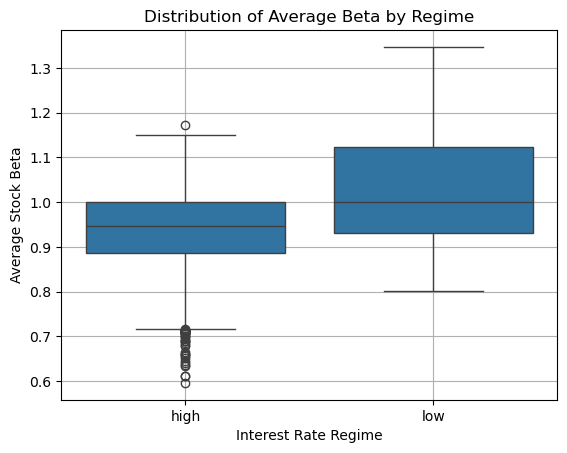

In [12]:
sns.boxplot(data=beta_regime_df, x="regime", y="avg_beta")
plt.title("Distribution of Average Beta by Regime")
plt.xlabel("Interest Rate Regime")
plt.ylabel("Average Stock Beta")
plt.grid(True)
plt.show()


As we can deduce from the returns of SPY, during periods of low interest rates, SPY's daily returns increase and the volatility decreases. This should indicate to us that we're classifying the regimes correctly, as we expect there to be more growth in SPY during these periods. Conversely, during high interest rate periods, SPY's daily returns seem to drop while volatility increases, signifying more turbulent market conditions. While the sample size for low rate regimes is relatively small, these results align with economic expectations and could be further strengthened with access to a broader historical dataset.

The differences between average stock beta from low rate regimes and high rate regimes also reinforce the validity of the rolling median as a regime classifier. In low rate regimes, the classifier should be able to consistently capture periods where investors are willing to take on more risk, this is evidenced by the average beta of low rate regimes and the increased standard deviation. Conversely, the high rate regime sees lower average beta values and small dispersion between beta values, effectively capturing the differences between the two regimes.

Taken together, these results support the conclusion that the rolling median of the federal funds rate effectively distinguishes between risk on and risk off market environments, validating its use as an indicator within the RBBR strategy.





---


# **Signal assessment**



The signal in the RBBR strategy would be the decision logic that dictates whether we buy a high beta portfolio or a low beta portfolio. This first requires us to determine which regime we're currently in, so the logic for the signal goes as follows:

1. Classify Regime:
  * "high" (FFR $\ge$ Median)
  * "low" (FFR < Median)

2. Selection criteria: Filter to stocks current S&P 500 constituents

3. Portfolio Selection:
  * Buy the 10 highest beta stocks if "low"
  * Buy the 10 lowest beta stocks if "high"

This decision rule serves as the strategy's signal, which allows it to shift its allocations depending on the current interest rate environment.

While we can't necessarily test the signal in isolation from the strategy, we can evaluate the signal to see whether it correctly selects the correct portfolios depending on the regime.

In [13]:
def test_signal(beta_df, ffr, rebal_f, sp500_components):
  results = []

  for date in beta_df.index[::rebal_f]:
      regime =  ffr.loc[date, "regime"]

      beta_today = beta_df.loc[date].dropna()
      components = sp500_components[date]

      valid_tickers = [t for t in components if t in beta_today.index]
      beta_today = beta_today.loc[valid_tickers]

      if regime == "low":
        selected = beta_today.nlargest(10)
        expected = beta_today.sort_values(ascending=False).head(10)
      else:
        selected = beta_today.nsmallest(10)
        expected = beta_today.sort_values(ascending=True).head(10)

      tickers_selected = sorted(selected.index.tolist())
      tickers_expected = sorted(expected.index.tolist())

      betas_selected = selected.values.tolist()
      betas_expected = expected.values.tolist()

      results.append({
            "date": date,
            "regime": regime,
            "selected": tickers_selected,
            "expected": tickers_expected,
            "selected_betas": betas_selected,
            "expected_betas": betas_expected,
            "match": set(selected.index) == set(expected.index)
        })

  return pd.DataFrame(results)

signal_df = test_signal(beta_df[beta_w], FFR_df[ffr_w],
                        rebalancing[rebal_f], bt.sp500_comp)
display(signal_df)
print(f"Number of incorrect selections: {len(signal_df) - signal_df['match'].sum()}")

,date,regime,selected,expected,selected_betas,expected_betas,match
0,2018-01-02,high,"[AON, COTY, EXPE, FL, M, MAC, MAT, NKE, SBAC, ...","[AON, COTY, EXPE, FL, M, MAC, MAT, NKE, SBAC, ...","[-2.7765736301533406, -0.6741674313317273, -0....","[-2.7765736301533406, -0.6741674313317273, -0....",True
1,2018-02-01,high,"[AEP, AWK, CL, CLX, D, EQIX, KDP, MAT, SBUX, SO]","[AEP, AWK, CL, CLX, D, EQIX, KDP, MAT, SBUX, SO]","[-1.678215035560032, -0.2853441046155516, -0.2...","[-1.678215035560032, -0.2853441046155516, -0.2...",True
2,2018-03-05,high,"[AEP, CHD, COTY, D, DTE, DUK, KDP, SO, WYNN, XEL]","[AEP, CHD, COTY, D, DTE, DUK, KDP, SO, WYNN, XEL]","[-0.14181720338118436, 0.12280864393302733, 0....","[-0.14181720338118436, 0.12280864393302733, 0....",True
3,2018-04-04,high,"[AEP, D, DTE, DUK, EIX, KDP, MAT, SO, SRE, XEL]","[AEP, D, DTE, DUK, EIX, KDP, MAT, SO, SRE, XEL]","[-0.06323131837817039, 0.1697950147612321, 0.2...","[-0.06323131837817039, 0.1697950147612321, 0.2...",True
4,2018-05-03,high,"[AEP, COTY, DTE, DUK, KDP, LNT, MAT, NEE, SO, ...","[AEP, COTY, DTE, DUK, KDP, LNT, MAT, NEE, SO, ...","[0.11529083465306217, 0.20749887064678088, 0.2...","[0.11529083465306217, 0.20749887064678088, 0.2...",True
...,...,...,...,...,...,...,...
84,2025-01-07,high,"[AEP, AES, CBOE, CE, DG, ETR, IFF, IP, MO, VZ]","[AEP, AES, CBOE, CE, DG, ETR, IFF, IP, MO, VZ]","[-0.6868339288219711, -0.5711599669715607, -0....","[-0.6868339288219711, -0.5711599669715607, -0....",True
85,2025-02-07,high,"[AEP, CBOE, CE, CI, CL, CME, CNC, FSLR, IFF, WBA]","[AEP, CBOE, CE, CI, CL, CME, CNC, FSLR, IFF, WBA]","[-0.7590861888835517, -0.5503926184849656, -0....","[-0.7590861888835517, -0.5503926184849656, -0....",True
86,2025-03-11,high,"[BG, CAG, CBOE, CI, CME, HSY, MKTX, MRK, WBA, ...","[BG, CAG, CBOE, CI, CME, HSY, MKTX, MRK, WBA, ...","[-0.4072829924276272, -0.3877083162178218, -0....","[-0.4072829924276272, -0.3877083162178218, -0....",True
87,2025-04-09,high,"[AWK, CAG, CNC, ED, GIS, HRL, HSY, MDLZ, MKTX,...","[AWK, CAG, CNC, ED, GIS, HRL, HSY, MDLZ, MKTX,...","[-0.2583639118757392, -0.2242710370695328, -0....","[-0.2583639118757392, -0.2242710370695328, -0....",True


Number of incorrect selections: 0


To validate the correctness of the signal logic, we tested whether the signal consistently selects the top 10 highest beta stocks during low-rate regimes, and the bottom 10 lowest beta stocks during high-rate regimes, in accordance with our decision rule. Since it is difficult to visually verify whether the selected tickers exactly match the expected output, we included a match column that checks whether the selected and expected ticker sets are identical.

The result shows 0 incorrect selections, confirming that the signal logic has been implemented correctly and performs as intended across all rebalancing dates.



---


# **Rules assessment**


The rules in the RBBR strategy define how the portfolio is constructed at each rebalancing period once a regime has been classified. The strategy follows a fixed set of rules:

1. Classify the current regime using the rolling median of the federal funds rate
2. Filter the stock universe to current day's S&P 500 constituents
3. Create a portfolio using the signal logic
  * Top 10 highest beta stocks if low rate regime
  * Top 10 lowest beta stocks if high rate regime
4. Apply transaction costs to simulate market frictions
5. Rebalance the portfolio according to the specified interval, marking-to-market in between rebalancing periods

We will test these rules for the first rebalancing period in order to test if the logic works correctly as we had implemented in our backtester.

In [14]:
def test_rebalance_steps(backtester, start_point, beta_window,
                         regime_window, rebal_freq, num_steps):

    beta_df = backtester.betas_df[beta_window]
    ffr_df = backtester.ffr_df[regime_window]
    #rebal_dates = beta_df.index[::rebalancing[rebal_f]]

    start_date_aligned = min([d for d in beta_df.index if d >= start_point])
    start_idx = beta_df.index.get_loc(start_date_aligned)

    rebal_dates = beta_df.index[start_idx:start_idx + rebalancing[rebal_freq] * num_steps : rebalancing[rebal_freq]]

    records = []

    for date in rebal_dates:
        if date not in beta_df.index or date not in ffr_df.index:
            continue

        beta_today = beta_df.loc[date]
        ffr_today = ffr_df.loc[date]

        regime = ffr_today["regime"]
        rolling_median = ffr_today["rolling_median"]
        fed_funds_rate = ffr_today["FEDFUNDS"]

        tickers = backtester.sp500_comp[date]
        if not tickers:
            continue

        valid_betas = beta_today[[tk for tk in tickers if tk in beta_today and tk in backtester.prices.columns]].dropna()

        if len(valid_betas) < 10:
            continue

        selected = valid_betas.nlargest(10) if regime == "low" else valid_betas.nsmallest(10)
        prices_today = backtester.prices.loc[date, selected.index]
        #print(selected[:10])

        capital_per_stock = backtester.INITIAL_BALANCE / 10
        shares = capital_per_stock / prices_today
        commission = (shares * backtester.COMMISSIONS_PER_SHARE).sum()
        portfolio_value = (shares * prices_today).sum() - commission

        records.append({
            "date": date,
            "regime": regime,
            "ffr": fed_funds_rate,
            "rolling_median": rolling_median,
            "selected_tickers": sorted(selected.index.tolist()),
            "avg_beta": selected.mean(),
            "min_beta": selected.min(),
            "max_beta": selected.max(),
            "commission": round(commission,2),
            "portfolio_value": round(portfolio_value,2)
        })

    return pd.DataFrame(records)


testing_step = test_rebalance_steps(backtester = bt,
                           start_point = pd.Timestamp("2018-01-02"),
                           beta_window=beta_w,
                           regime_window = ffr_w,
                           rebal_freq=rebal_f,
                            num_steps=1)

display(testing_step.T)

,0
date,2018-01-02 00:00:00
regime,high
ffr,1.41
rolling_median,0.16
selected_tickers,"[AON, COTY, EXPE, FL, M, MAC, MAT, NKE, SBAC, ..."
avg_beta,-0.567661
min_beta,-2.776574
max_beta,-0.04543
commission,0.33
portfolio_value,24999.67


In [15]:
df_check, _ = bt.run_dynamic_strategy(beta_w, ffr_w, rebal_f, start_date)
display(df_check.iloc[0])

Portfolio Value                                                  24999.67
PnL                                                                 -0.33
Portfolio Components    [AON, COTY, EXPE, FL, M, MAC, MAT, NKE, SBAC, ...
Average Beta                                                    -0.567661
Minimum Beta                                                    -2.776574
Maximum Beta                                                     -0.04543
Regime                                                               high
Trend                                                              rising
Return                                                                NaN
Cumulative Return                                                     0.0
Name: 2018-01-02 00:00:00, dtype: object

The first step of the strategy implementation appears to be functioning correctly. The portfolio construction logic selects the same tickers as expected, the resulting portfolios exhibit identical beta characteristics (average, minimum, and maximum), and the portfolio values after applying transaction costs match exactly. This confirms that the rule logic is being executed consistently and aligns with our backtester's intended behavior.

Now we will test the first 5 rows of the backtester and the testing steps:

In [16]:
testing_step = test_rebalance_steps(backtester = bt,
                           start_point = start_date,
                           beta_window=beta_w,
                           regime_window = ffr_w,
                           rebal_freq=rebal_f,
                            num_steps=5)

display(testing_step.T)

,0,1,2,3,4
date,2018-01-02 00:00:00,2018-02-01 00:00:00,2018-03-05 00:00:00,2018-04-04 00:00:00,2018-05-03 00:00:00
regime,high,high,high,high,high
ffr,1.41,1.42,1.51,1.69,1.7
rolling_median,0.16,0.16,0.16,0.16,0.16
selected_tickers,"[AON, COTY, EXPE, FL, M, MAC, MAT, NKE, SBAC, ...","[AEP, AWK, CL, CLX, D, EQIX, KDP, MAT, SBUX, SO]","[AEP, CHD, COTY, D, DTE, DUK, KDP, SO, WYNN, XEL]","[AEP, D, DTE, DUK, EIX, KDP, MAT, SO, SRE, XEL]","[AEP, COTY, DTE, DUK, KDP, LNT, MAT, NEE, SO, ..."
avg_beta,-0.567661,-0.287625,0.210726,0.213838,0.246215
min_beta,-2.776574,-1.678215,-0.141817,-0.063231,0.115291
max_beta,-0.04543,-0.005553,0.314549,0.283953,0.291899
commission,0.33,0.32,0.35,0.39,0.46
portfolio_value,24999.67,24999.68,24999.65,24999.61,24999.54


In [17]:
display(df_check.iloc[::rebalancing[rebal_f]].head(5).T)

Date,2018-01-02,2018-02-01,2018-03-05,2018-04-04,2018-05-03
Portfolio Value,24999.67,25247.29,24798.99,24964.12,25344.07
PnL,-0.33,247.29,-201.01,-35.88,344.07
Portfolio Components,"[AON, COTY, EXPE, FL, M, MAC, MAT, NKE, SBAC, ...","[AON, COTY, EXPE, FL, M, MAC, MAT, NKE, SBAC, ...","[AEP, AWK, CL, CLX, D, EQIX, KDP, MAT, SBUX, SO]","[AEP, CHD, COTY, D, DTE, DUK, KDP, SO, WYNN, XEL]","[AEP, D, DTE, DUK, EIX, KDP, MAT, SO, SRE, XEL]"
Average Beta,-0.567661,-0.567661,-0.287625,0.210726,0.213838
Minimum Beta,-2.776574,-2.776574,-1.678215,-0.141817,-0.063231
Maximum Beta,-0.04543,-0.04543,-0.005553,0.314549,0.283953
Regime,high,high,high,high,high
Trend,rising,rising,rising,rising,rising
Return,NaN,-0.010924,0.009762,0.002917,-0.00484
Cumulative Return,0.0,0.009905,-0.008027,-0.001422,0.013776


The tickers here selected differ from the backtest, but the reasoning for this is due to the mark-to-market affect. In our backtester, we mark-to-market the portfolio before we rebalance our portfolio and add the new positions, which makes the portfolios here lag each other by one day:

In [18]:
start = pd.Timestamp("2018-01-03").normalize()
idx = df_check.index.get_indexer([start], method = 'bfill')[0]
rebal_f = "monthly"
display(df_check.iloc[idx::rebalancing[rebal_f]].head(5).T)

Date,2018-01-03,2018-02-02,2018-03-06,2018-04-05,2018-05-04
Portfolio Value,25011.13,25124.07,24593.55,25133.61,25387.63
PnL,11.13,124.07,-406.45,133.61,387.63
Portfolio Components,"[AON, COTY, EXPE, FL, M, MAC, MAT, NKE, SBAC, ...","[AEP, AWK, CL, CLX, D, EQIX, KDP, MAT, SBUX, SO]","[AEP, CHD, COTY, D, DTE, DUK, KDP, SO, WYNN, XEL]","[AEP, D, DTE, DUK, EIX, KDP, MAT, SO, SRE, XEL]","[AEP, COTY, DTE, DUK, KDP, LNT, MAT, NEE, SO, ..."
Average Beta,-0.567661,-0.287625,0.210726,0.213838,0.246215
Minimum Beta,-2.776574,-1.678215,-0.141817,-0.063231,0.115291
Maximum Beta,-0.04543,-0.005553,0.314549,0.283953,0.291899
Regime,high,high,high,high,high
Trend,rising,rising,rising,rising,rising
Return,0.000458,-0.004881,-0.008284,0.006789,0.001719
Cumulative Return,0.000458,0.004976,-0.016245,0.005358,0.015519




---


# **Hyperparameter Optimization**


For this section, we will focus on optimizing the hyperparameters for the RBBR strategy using grid search over the entire backtesting period.

In [19]:
grid_search_stats = []
comb_size = len(beta_windows) * len(FFR_windows) * len(rebalancing)
for i, (beta_w, ffr_w, rebal_f) in enumerate(itertools.product(beta_windows.keys(),
                                                               FFR_windows.keys(), rebalancing.keys())):
    df, _ = bt.run_dynamic_strategy(beta_w, ffr_w, rebal_f, start_date)
    print(f"\rEvaluating {beta_w}, {ffr_w}, {rebal_f}; {((i+1)/comb_size)*100:.2f}% complete",
          end='', flush=True)

    eval = PerformanceEvaluator(
        df,
        beta_window=beta_w,
        ffr_window=ffr_w,
        rebal_freq=rebal_f,
        strat_type="RBBR"
    )
    grid_search_stats.append(eval.get_strat_stats())

summary_df = pd.concat(grid_search_stats, ignore_index=True)

sorting_metrics = ["Annualized Sharpe Ratio", "Cumulative Return(%)"]
summary_df = summary_df.sort_values(by=sorting_metrics, ascending=False)
summary_df_formatted = eval.format_summary_table(summary_df)

display(summary_df_formatted)

Evaluating 1y, 20y, yearly; 100.00% complete

,Beta Window,FFR Window,Rebalancing,Strategy Type,Cumulative Return(%),Annualized Return(%),Annualized Volatility(%),Annualized Sharpe Ratio,Max Drawdown(%),Max DD Duration,Max DD Start,Max DD End
148,6m,10y,daily,RBBR,494.42%,27.52%,30.00%,0.95,31.01%,598 trading days,2022-04-11,2024-08-27
152,6m,15y,daily,RBBR,494.42%,27.52%,30.00%,0.95,31.01%,598 trading days,2022-04-11,2024-08-27
68,1m,2y,daily,RBBR,496.13%,27.39%,34.77%,0.87,54.16%,279 trading days,2022-12-09,2024-01-22
180,1y,10y,daily,RBBR,372.74%,23.63%,29.43%,0.86,34.18%,796 trading days,2021-12-28,2025-02-28
184,1y,15y,daily,RBBR,372.74%,23.63%,29.43%,0.86,34.18%,796 trading days,2021-12-28,2025-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...
15,2d,4y,yearly,RBBR,-17.45%,-2.55%,26.71%,0.04,54.45%,1219 trading days,2018-01-29,2022-11-29
19,2d,5y,yearly,RBBR,-17.45%,-2.55%,26.71%,0.04,54.45%,1219 trading days,2018-01-29,2022-11-29
23,2d,10y,yearly,RBBR,-17.45%,-2.55%,26.71%,0.04,54.45%,1219 trading days,2018-01-29,2022-11-29
27,2d,15y,yearly,RBBR,-17.45%,-2.55%,26.71%,0.04,54.45%,1219 trading days,2018-01-29,2022-11-29


We aim to visualize how each of the strategy's hyperparameters impacts the Sharpe ratio. To do this, we construct a 3D plot where each axis represents one of the hyperparameters:

* X-axis: Beta window

* Y-axis: Federal funds rate window

* Z-axis: Rebalancing frequency

Each point in the plot corresponds to a unique combination of these three hyperparameters. The points are color-coded based on the resulting Sharpe ratio, allowing us to visually identify which regions of the hyperparameter space are associated with stronger risk-adjusted performance. This visualization helps reveal patterns and clustering behavior in high-performing configurations, allowing us to better understand where more reasonable configurations would be located

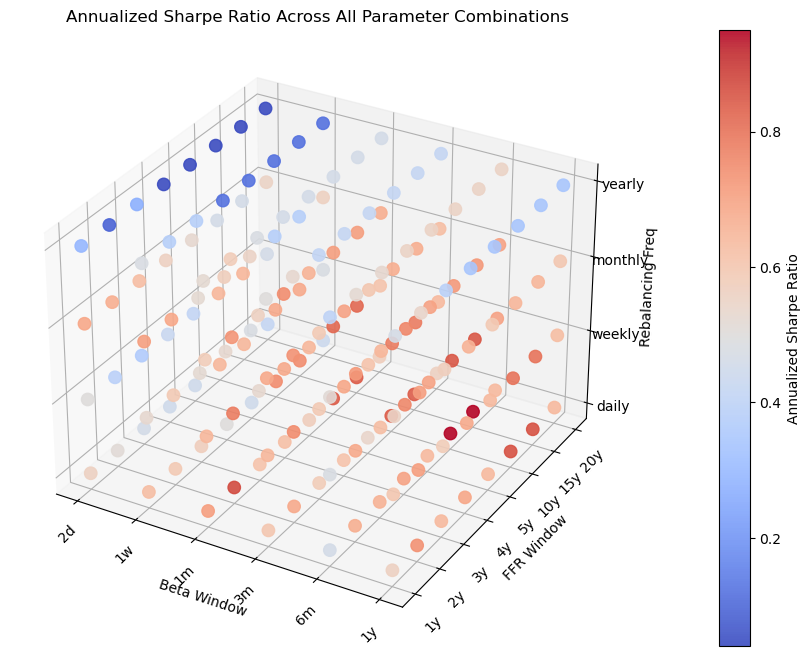

In [20]:
beta_labels = sorted(summary_df['Beta Window'].unique(), key=lambda x: beta_windows[x])
ffr_labels = sorted(summary_df['FFR Window'].unique(), key=lambda x: FFR_windows[x])
rebal_labels = sorted(summary_df['Rebalancing'].unique(), key=lambda x: rebalancing[x])

beta_map = {label: i for i, label in enumerate(beta_labels)}
ffr_map = {label: i for i, label in enumerate(ffr_labels)}
rebal_map = {label: i for i, label in enumerate(rebal_labels)}

summary_df['Beta_Num'] = summary_df['Beta Window'].map(beta_map)
summary_df['FFR_Num'] = summary_df['FFR Window'].map(ffr_map)
summary_df['Rebal_Num'] = summary_df['Rebalancing'].map(rebal_map)

# Choose performance metric to visualize
color_metric = 'Annualized Sharpe Ratio'  #'Cumulative Return(%)'

X = summary_df['Beta_Num']
Y = summary_df['FFR_Num']
Z = summary_df['Rebal_Num']
C = summary_df[color_metric]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X, Y, Z, c=C, cmap='coolwarm', s=80, alpha=0.9)
cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label(color_metric)

ax.set_xticks(list(beta_map.values()))
ax.set_xticklabels(beta_labels, rotation=45)
ax.set_xlabel("Beta Window")

ax.set_yticks(list(ffr_map.values()))
ax.set_yticklabels(ffr_labels, rotation=45)
ax.set_ylabel("FFR Window")

ax.set_zticks(list(rebal_map.values()))
ax.set_zticklabels(rebal_labels)
ax.set_zlabel("Rebalancing Freq")

ax.set_title(f"{color_metric} Across All Parameter Combinations")
plt.show()

While the 3D plot may be somewhat difficult to interpret visually, there appears to be a noticeable concentration of higher Sharpe ratios in the far bottom-right corner of the hyperparameter cube. This region corresponds to longer beta windows (3 months to 1 year), longer FFR windows (10, 15, and 20 years), and lower-frequency rebalancing periods (daily and weekly rebalancing). This trend suggests that the strategy performs best when using more stable beta estimates, broader regime classification periods, and more frequent rebalancing, despite the additional transaction costs.

In [21]:
grid_search_stats = []
comb_size = len(beta_windows) * len(rebalancing)

for i, (beta_w, freq) in enumerate(itertools.product(beta_windows.keys(), rebalancing.keys())):
    df_low, _ = bt.run_static_strategy(beta_w, freq, start_date, False)
    df_high, _ = bt.run_static_strategy(beta_w, freq, start_date, True)
    print(f"\rEvaluating {beta_w}, {ffr_w}; {((i+1)/comb_size)*100:.2f}% complete",
          end='', flush=True)

    eval = PerformanceEvaluator(
        df_low,
        beta_window=beta_w,
        ffr_window=None,
        rebal_freq=freq,
        strat_type="Low"
    )

    grid_search_stats.append(eval.get_strat_stats())

    eval = PerformanceEvaluator(
        df_high,
        beta_window=beta_w,
        ffr_window=None,
        rebal_freq=freq,
        strat_type="High"
    )
    grid_search_stats.append(eval.get_strat_stats())



summary_df_static = pd.concat(grid_search_stats, ignore_index=True)

sorting_metrics = ["Annualized Sharpe Ratio", "Cumulative Return(%)"]
summary_df_static = summary_df_static.sort_values(by=sorting_metrics, ascending=False)
summary_df_static_formatted = eval.format_summary_table(summary_df_static)

display(summary_df_static_formatted)

Evaluating 1y, 20y; 100.00% complete

,Beta Window,Rebalancing,Strategy Type,Cumulative Return(%),Annualized Return(%),Annualized Volatility(%),Annualized Sharpe Ratio,Max Drawdown(%),Max DD Duration,Max DD Start,Max DD End
0,2d,daily,Dynamic Low Beta,347.93%,22.57%,28.35%,0.86,45.00%,354 trading days,2018-02-02,2019-07-01
39,6m,yearly,Dynamic High Beta,433.14%,25.06%,37.85%,0.79,44.90%,322 trading days,2018-09-05,2019-12-13
13,1w,monthly,Dynamic High Beta,324.88%,21.45%,35.86%,0.73,39.78%,317 trading days,2018-06-07,2019-09-10
24,3m,daily,Dynamic Low Beta,116.42%,11.03%,16.25%,0.73,19.49%,544 trading days,2022-01-18,2024-03-18
16,1m,daily,Dynamic Low Beta,129.48%,11.92%,17.96%,0.72,20.87%,279 trading days,2022-12-09,2024-01-22
47,1y,yearly,Dynamic High Beta,341.86%,22.00%,38.84%,0.71,46.97%,395 trading days,2021-11-08,2023-06-05
18,1m,weekly,Dynamic Low Beta,131.89%,12.08%,18.32%,0.71,28.30%,219 trading days,2023-01-09,2023-11-20
37,6m,monthly,Dynamic High Beta,334.22%,21.63%,45.35%,0.66,49.12%,382 trading days,2018-06-07,2019-12-11
31,3m,yearly,Dynamic High Beta,248.24%,18.18%,37.26%,0.64,47.17%,387 trading days,2021-11-09,2023-05-24
23,1m,yearly,Dynamic High Beta,244.20%,18.04%,36.34%,0.64,53.65%,287 trading days,2022-04-05,2023-05-25


We then run a grid-search to evaluate which parameters are optimal for the dynamic high and low beta strategies to evaluate the RBBR strategy against.

In [22]:
results_bnh = bt.run_sp500_bnh(start_date)
eval = PerformanceEvaluator(results_bnh,
                            beta_window=None,
                            ffr_window=None,
                            rebal_freq=None,
                            strat_type="BnH")

bnh_stats = eval.get_strat_stats()
bnh_summary = eval.format_summary_table(bnh_stats)

display(bnh_summary)

,Strategy Type,Cumulative Return(%),Annualized Return(%),Annualized Volatility(%),Annualized Sharpe Ratio,Max Drawdown(%),Max DD Duration,Max DD Start,Max DD End
0,SPY Buy & Hold,142.03%,12.64%,20.00%,0.7,33.72%,488 trading days,2022-01-04,2023-12-12


The SPY Buy and Hold benchmark was ran, and then each of the best performing models, the optimal RBBR, optimal dynamic high beta, optimal dynamic low beta, and SPY buy and hold are aggregated into a single dictionary for a data summary, and for later plotting.

In [23]:
best_parameters_rbbr = [summary_df['Beta Window'].iloc[0], summary_df['FFR Window'].iloc[0], summary_df['Rebalancing'].iloc[0]]

first_low = summary_df_static[summary_df_static["Strategy Type"] == "Dynamic Low Beta"].iloc[0]
best_parameters_low = [first_low["Beta Window"], first_low["Rebalancing"]]

first_high = summary_df_static[summary_df_static["Strategy Type"] == "Dynamic High Beta"].iloc[0]
best_parameters_high = [first_high["Beta Window"], first_high["Rebalancing"]]

results_best_low, _ = bt.run_static_strategy(best_parameters_low[0], best_parameters_low[1], start_date, high_beta=False)
results_best_high, _ = bt.run_static_strategy(best_parameters_high[0], best_parameters_high[1], start_date, high_beta=True)
results_best_rbbr, _ = bt.run_dynamic_strategy(best_parameters_rbbr[0], best_parameters_rbbr[1], best_parameters_rbbr[2], start_date)

portfolio_dict = {
    "Buy & Hold SPY": results_bnh,
    f"Best Static Low Beta {best_parameters_low}": results_best_low,
    f"Best Static High Beta {best_parameters_high}": results_best_high,
    f"Best Dynamic RBBR {best_parameters_rbbr}": results_best_rbbr
}


eval_bnh = PerformanceEvaluator(results_bnh, strat_type="BnH")
eval_low = PerformanceEvaluator(results_best_low, beta_window=best_parameters_low[0],
                                rebal_freq=best_parameters_low[1], strat_type="Low")
eval_high = PerformanceEvaluator(results_best_high, beta_window=best_parameters_high[0],
                                 rebal_freq=best_parameters_high[1], strat_type="High")
eval_rbbr = PerformanceEvaluator(results_best_rbbr, beta_window=best_parameters_rbbr[0],
                                 ffr_window=best_parameters_rbbr[1],
                                 rebal_freq=best_parameters_rbbr[2], strat_type="RBBR")

summary_df_best = pd.concat([
    eval_bnh.get_strat_stats(),
    eval_low.get_strat_stats(),
    eval_high.get_strat_stats(),
    eval_rbbr.get_strat_stats()
], ignore_index=True)


formatted_summary = eval_rbbr.format_summary_table(summary_df_best)

display(formatted_summary)


,Strategy Type,Cumulative Return(%),Annualized Return(%),Annualized Volatility(%),Annualized Sharpe Ratio,Max Drawdown(%),Max DD Duration,Max DD Start,Max DD End,Beta Window,Rebalancing,FFR Window
0,SPY Buy & Hold,142.03%,12.64%,20.00%,0.70,33.72%,488 trading days,2022-01-04,2023-12-12,NaN,NaN,NaN
1,Dynamic Low Beta,347.93%,22.57%,28.35%,0.86,45.00%,354 trading days,2018-02-02,2019-07-01,2d,daily,NaN
2,Dynamic High Beta,433.14%,25.06%,37.85%,0.79,44.90%,322 trading days,2018-09-05,2019-12-13,6m,yearly,NaN
3,RBBR,494.42%,27.52%,30.00%,0.95,31.01%,598 trading days,2022-04-11,2024-08-27,6m,daily,10y


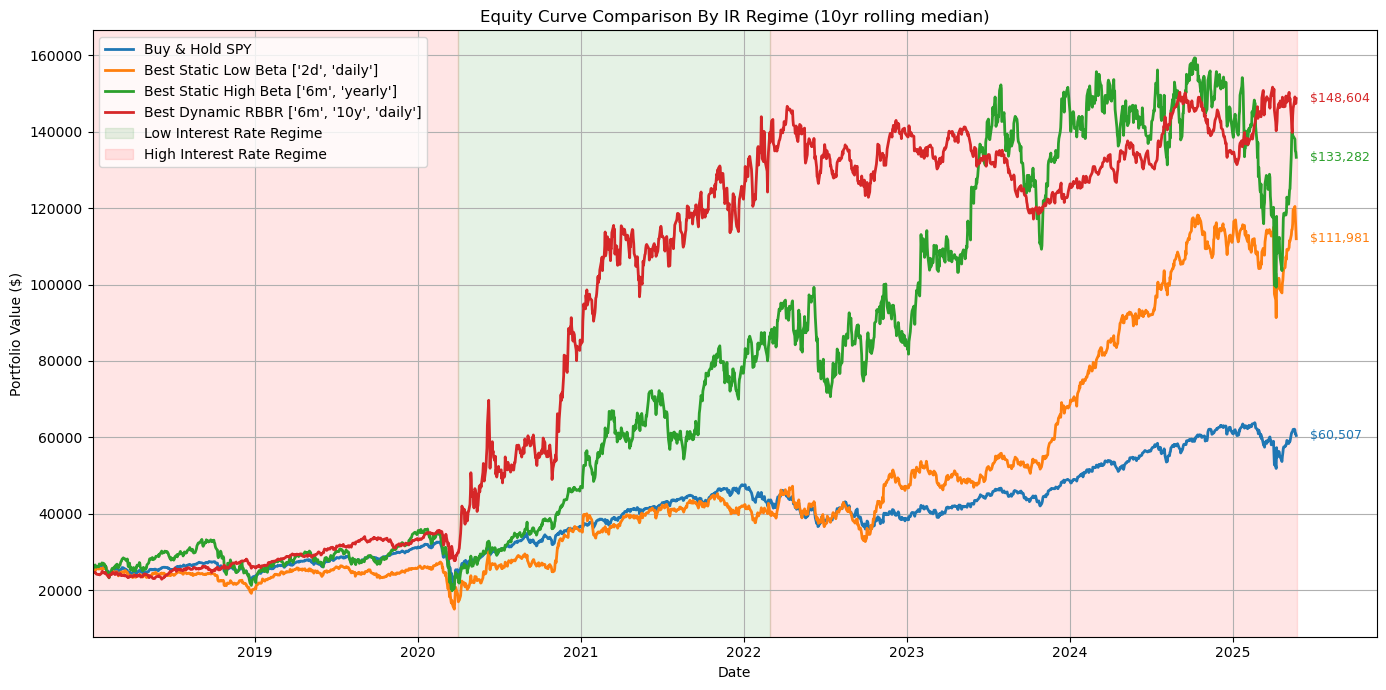

In [25]:
def plot_equity_curves(portfolio_dict, ffr_regime_df=None, regime_colors=None,
                       title="Equity Curve Comparison By IR Regime"):
    plt.figure(figsize=(14, 7))

    lines = {}
    for label, df in portfolio_dict.items():
        line, = plt.plot(df.index.to_numpy(), df['Portfolio Value'].to_numpy(), label=label, linewidth=2)
        lines[label] = line
        final_date = df.index[-1]
        final_value = df['Portfolio Value'].iloc[-1]
        color = lines[label].get_color()

        plt.text(final_date + pd.Timedelta(days=30),
                 final_value,
                 f"${final_value:,.0f}",
                 fontsize=9,
                 color=color,
                 va='center')

    if ffr_regime_df is not None and regime_colors is not None:
        prev_regime = None
        start_date = ffr_regime_df.index[0]

        for date, row in ffr_regime_df.iterrows():
            regime = row['regime']
            if regime != prev_regime:
                if prev_regime is not None:
                    end_date = date
                    color = regime_colors.get(prev_regime, "white")
                    plt.axvspan(start_date, end_date, color=color, alpha=0.1)
                    start_date = end_date
                prev_regime = regime

        if prev_regime is not None:
            end_date = ffr_regime_df.index[-1]
            color = regime_colors.get(prev_regime, "white")
            plt.axvspan(start_date, end_date, color=color, alpha=0.1)

    sample_df = list(portfolio_dict.values())[0]
    plt.xlim(sample_df.index[0], sample_df.index[-1]+pd.Timedelta(days=180))
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value ($)")
    regime_patches = [
    mpatches.Patch(color=regime_colors_simple['low'], alpha=0.1, label='Low Interest Rate Regime'),
    mpatches.Patch(color=regime_colors_simple['high'], alpha=0.1, label='High Interest Rate Regime')
]

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend()
    plt.legend(handles + regime_patches, labels + [p.get_label() for p in regime_patches], loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


regime_colors_simple = {
    'high': 'red',
    'low': 'green'
}

plot_equity_curves(portfolio_dict, FFR_df['10y'],
                   regime_colors_simple, title= "Equity Curve Comparison By IR Regime (10yr rolling median)")

By plotting the strategies together, we can see that the RBBR strategy outperformed the others during the initial high interest rate regime, then significantly outperformed the others during 2020 and the stimulus era. However, this strategy was severely hindered during the 2022 bear market, while the drawdown was not too severe, the duration was significantly longer than the other strategies.

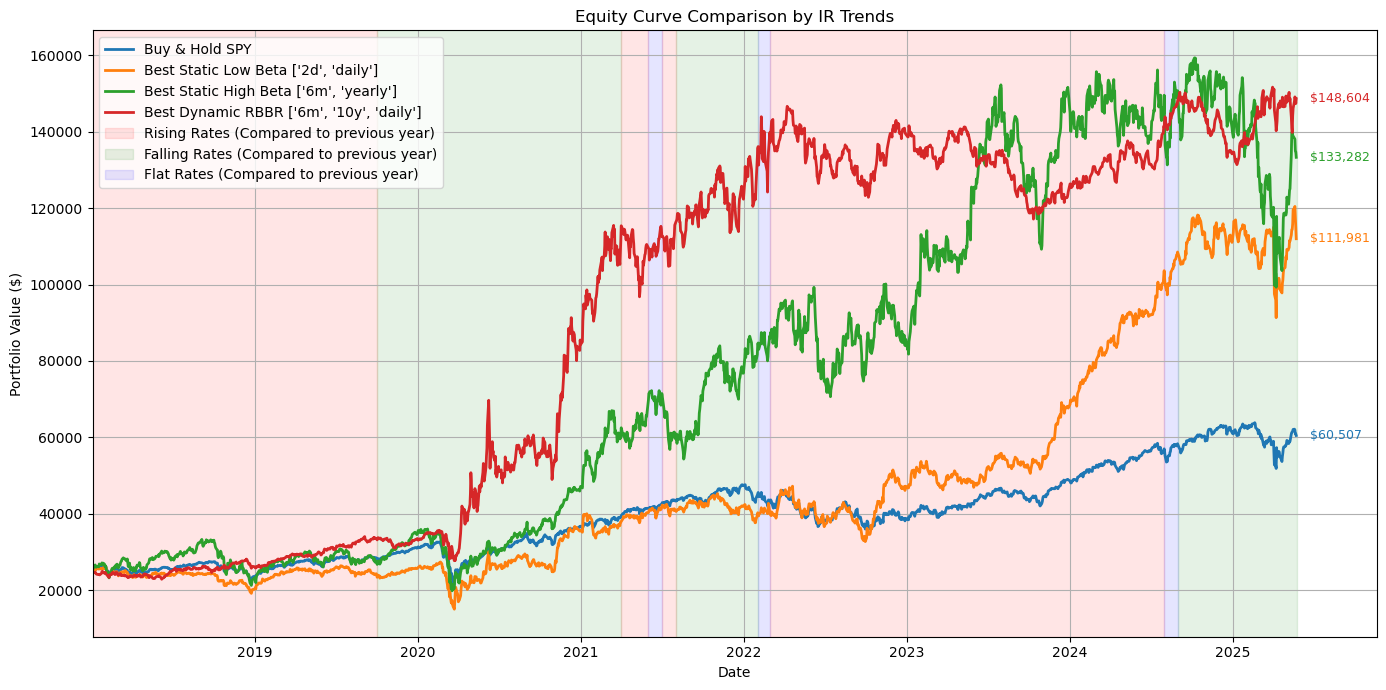

In [27]:
def plot_equity_curves_trend(portfolio_dict, ffr_regime_df=FFR_df['2y'], regime_colors=None,
                             title="Equity Curve Comparison by IR Trends"):
    plt.figure(figsize=(14, 7))

    lines = {}

    for label, df in portfolio_dict.items():
        line, = plt.plot(df.index.to_numpy(), df['Portfolio Value'].to_numpy(), label=label, linewidth=2)
        lines[label] = line
        final_date = df.index[-1]
        final_value = df['Portfolio Value'].iloc[-1]
        color = lines[label].get_color()

        plt.text(final_date + pd.Timedelta(days=30),
                 final_value,
                 f"${final_value:,.0f}",
                 fontsize=9,
                 color=color,
                 va='center')

    if ffr_regime_df is not None and regime_colors is not None:
        prev_trend = None
        start_date = ffr_regime_df.index[0]

        for date, row in ffr_regime_df.iterrows():
            trend = row['trend']
            if trend != prev_trend:
                if prev_trend is not None:
                    end_date = date
                    color = regime_colors.get(prev_trend, "white")
                    plt.axvspan(start_date, end_date, color=color, alpha=0.1)
                    start_date = end_date
                prev_trend = trend

        if prev_trend is not None:
            end_date = ffr_regime_df.index[-1]
            color = regime_colors.get(prev_trend, "white")
            plt.axvspan(start_date, end_date, color=color, alpha=0.1)

    sample_df = list(portfolio_dict.values())[0]
    plt.xlim(sample_df.index[0], sample_df.index[-1] + pd.Timedelta(days = 180))
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value ($)")

    regime_patches = [
        mpatches.Patch(color=regime_colors['rising'], alpha=0.1, label='Rising Rates (Compared to previous year)'),
        mpatches.Patch(color=regime_colors['falling'], alpha=0.1, label='Falling Rates (Compared to previous year)'),
        mpatches.Patch(color=regime_colors['flat'], alpha=0.1, label='Flat Rates (Compared to previous year)')
    ]

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles + regime_patches, labels + [p.get_label() for p in regime_patches], loc='best')

    plt.grid(True)
    plt.tight_layout()
    plt.show()

regime_colors_simple = {
    'rising': 'red',
    'falling': 'green',
    'flat': 'blue'
}

plot_equity_curves_trend(portfolio_dict, FFR_df['2y'], regime_colors_simple)

The strategy's performance here is visualized alongside interest rate trends, with background shading to represent rate regimes, green for falling rates, and red for rising rates. While this visualization offers context, I was unable to draw consistent or actionable insights from the interest rate trends alone.




---


# **Walk-Forward Analysis**


deally, walk-forward validation involves testing every possible hyperparameter combination on each training window, then selecting the best-performing configuration to evaluate on the subsequent testing window. However, since our strategy includes 192 possible parameter combinations, this full grid search would be computationally expensive.

To make the analysis more efficient while still robust, we narrowed the evaluation to the top 10 parameter configurations identified from our global grid search (ranked by Sharpe ratio and cumulative return). For each walk-forward fold:

1. A training period was defined (2 years) followed by a testing period (6 months)

2. Each of the top 10 configurations was evaluated on the training data

3. The configuration with the highest sharpe ratio on the training window was selected as the best model for that fold

4. This selected model was then evaluated on the out of sample testing period to record its performance

5. Key metrics of cumulative return, sharpe ratio, and max drawdown were also saved for each fold.

This process was repeated by sliding the training and testing windows forward in time until the available data was exhausted.

A key goal of this approach is to assess whether the globally best-performing configuration from the grid search is consistently selected as the best model within each training fold of the walk-forward analysis. If this global top model is frequently or consistently chosen across folds, and performs well on out-of-sample test data then we can be more confident that the model is not overfitting to the global backtest.

In [28]:
top_k_configs = summary_df.sort_values(
    by=["Annualized Sharpe Ratio", "Cumulative Return(%)"],
    ascending=False
).head(10)[["Beta Window", "FFR Window", "Rebalancing"]].values.tolist()
print(top_k_configs)

[['6m', '10y', 'daily'], ['6m', '15y', 'daily'], ['1m', '2y', 'daily'], ['1y', '10y', 'daily'], ['1y', '15y', 'daily'], ['6m', '10y', 'weekly'], ['6m', '15y', 'weekly'], ['1m', '10y', 'daily'], ['1m', '15y', 'daily'], ['3m', '10y', 'daily']]


In [29]:
train_length = pd.DateOffset(years=2)
test_length = pd.DateOffset(months=6)
train_start = pd.Timestamp("2018-01-01")

results = []

while True:
    train_end = train_start + train_length - pd.Timedelta(days=1)
    test_start = train_end + pd.Timedelta(days=1)
    test_end = test_start + test_length - pd.Timedelta(days=1)

    if test_end > prices.index[-1]:  # Stop if we run out of data
        break


    loader.prices = prices[(prices.index >= train_start) & (prices.index <= train_end)]
    bt = Backtester(loader, beta_calc)

    best_score = -float("inf")
    best_config = None

    for beta_w, ffr_w, rebal_f in top_k_configs:

        res_train, _ = bt.run_dynamic_strategy(beta_w, ffr_w, rebal_f, train_start, train_end)
        pe = PerformanceEvaluator(
            df=res_train,
            rf=0.0,
            beta_window=beta_w,
            ffr_window=ffr_w,
            rebal_freq=rebal_f,
            strat_type="RBBR"
        )
        sharpe = pe.get_sharpe()

        if sharpe > best_score:
            best_score = sharpe
            best_config = (beta_w, ffr_w, rebal_f)

    print(f"\nFold {len(results)+1}")
    print(f"Train: {train_start.date()} to {train_end.date()}")
    print(f"Test : {test_start.date()} to {test_end.date()}")


    loader.prices = prices[(prices.index >= test_start) & (prices.index <= test_end)]
    bt_test = Backtester(loader, beta_calc)
    res_test, _ = bt_test.run_dynamic_strategy(*best_config, test_start, test_end)

    pe_test = PerformanceEvaluator(
        df=res_test,
        rf=0.0,
        beta_window=best_config[0],
        ffr_window=best_config[1],
        rebal_freq=best_config[2],
        strat_type="RBBR"
    )
    test_stats = pe_test.get_strat_stats()
    test_stats["Train Start"] = train_start
    test_stats["Test Start"] = test_start
    test_stats["Beta Window"] = best_config[0]
    test_stats["FFR Window"] = best_config[1]
    test_stats["Rebalancing"] = best_config[2]

    results.append(test_stats)

    train_start = train_start + test_length  # Slide window

wf_results = pd.concat(results, ignore_index=True)

sorting_metrics = ["Annualized Sharpe Ratio", "Cumulative Return(%)"]
wf_results = wf_results.sort_values(by=sorting_metrics, ascending=False)
wf_formatted = eval.format_summary_table(wf_results)

display(wf_formatted)


Fold 1
Train: 2018-01-01 to 2019-12-31
Test : 2020-01-01 to 2020-06-30

Fold 2
Train: 2018-07-01 to 2020-06-30
Test : 2020-07-01 to 2020-12-31

Fold 3
Train: 2019-01-01 to 2020-12-31
Test : 2021-01-01 to 2021-06-30

Fold 4
Train: 2019-07-01 to 2021-06-30
Test : 2021-07-01 to 2021-12-31

Fold 5
Train: 2020-01-01 to 2021-12-31
Test : 2022-01-01 to 2022-06-30

Fold 6
Train: 2020-07-01 to 2022-06-30
Test : 2022-07-01 to 2022-12-31

Fold 7
Train: 2021-01-01 to 2022-12-31
Test : 2023-01-01 to 2023-06-30

Fold 8
Train: 2021-07-01 to 2023-06-30
Test : 2023-07-01 to 2023-12-31

Fold 9
Train: 2022-01-01 to 2023-12-31
Test : 2024-01-01 to 2024-06-30

Fold 10
Train: 2022-07-01 to 2024-06-30
Test : 2024-07-01 to 2024-12-31


,Beta Window,FFR Window,Rebalancing,Strategy Type,Cumulative Return(%),Annualized Return(%),Annualized Volatility(%),Annualized Sharpe Ratio,Max Drawdown(%),Max DD Duration,Max DD Start,Max DD End,Train Start,Test Start
1,6m,10y,daily,RBBR,64.60%,170.51%,57.55%,1.99,19.22%,37 trading days,2020-09-17,2020-11-06,2018-07-01,2020-07-01
9,1m,2y,daily,RBBR,22.11%,47.88%,21.64%,1.94,8.37%,35 trading days,2024-11-11,2024-12-31,2022-07-01,2024-07-01
8,1m,2y,daily,RBBR,9.83%,22.02%,10.48%,1.89,5.45%,28 trading days,2024-05-20,2024-06-28,2022-01-01,2024-01-01
2,6m,10y,daily,RBBR,34.83%,62.56%,36.42%,1.86,16.18%,75 trading days,2021-03-16,2021-06-30,2019-01-01,2021-01-01
5,1m,2y,daily,RBBR,13.59%,29.84%,18.44%,1.47,10.54%,51 trading days,2022-08-17,2022-10-27,2020-07-01,2022-07-01
7,1m,2y,daily,RBBR,6.61%,12.61%,13.31%,1.04,7.02%,79 trading days,2023-07-27,2023-11-15,2021-07-01,2023-07-01
3,6m,10y,daily,RBBR,8.67%,17.59%,27.85%,0.73,13.33%,37 trading days,2021-11-09,2021-12-31,2019-07-01,2021-07-01
0,1m,2y,daily,RBBR,-17.40%,-30.09%,91.49%,0.03,54.16%,79 trading days,2020-02-13,2020-06-05,2018-01-01,2020-01-01
6,1m,2y,daily,RBBR,-5.62%,-10.39%,13.97%,-0.78,9.14%,120 trading days,2023-01-09,2023-06-30,2021-01-01,2023-01-01
4,1y,10y,daily,RBBR,-16.96%,-29.57%,34.55%,-0.93,22.71%,122 trading days,2022-01-05,2022-06-30,2020-01-01,2022-01-01




---


# **Overfitting Assessment**




Based on the walk-forward analysis results, the optimal configuration identified through global grid search specifically, a 6-month rolling beta window, 10 year federal funds rate rolling median, and daily rebalancing RBBR model, consistently emerged as a top performing model across multiple out-of-sample test periods. This persistent selection suggests that the strategy's performance is not merely a result of overfitting to the full-sample backtest.

While walk-forward analysis suggests that the model is not overfitting to the full-sample backtest, it is important to recognize that the strategy is still subject to overfitting in a broader sense. This is primarily due to the presence of survivorship bias in the dataset. The data used here excludes companies that were delisted, merged, or had failed during the backtest period, meaning the model only learned from stocks that performed well enough to remain in the index.

As a result, the strategy is likely overfitting to a biased subset of the market that does not reflect the full range of investment outcomes. This inflates performance metrics by ignoring stocks that would have contributed meaningful risk or underperformance if they had been included. Although the strategy may still capture useful patterns in how market participants respond to interest rate regimes, its robustness in a fully representative market environment will remain unproven for now.

To improve the credibility of the results, future iterations of the strategy should be tested using point-in-time constituent data and include delisted or failed stocks. This would provide a more realistic evaluation of the model's performance and help determine whether its edge is persistent or data-dependent.

---

# **Future Work**

While I won't be able to include my own extensions to this strategy due to time constraints, there are several promising avenues for future research on the RBBR strategy, including:

* Selecting the number of assets in the portfolio as a tunable hyperparameter rather than keeping it fixed.

* Using unsupervised learning techniques, such as K-Means clustering, to classify interest rate regimes based on macroeconomic features.

* Incorporating dynamic position sizing, where allocation weights adapt based on beta magnitude, regime type, or risk exposure.

* Exploring alternative indicators for distinguishing risky versus non-risky assets beyond rolling beta, such as idiosyncratic volatility, momentum, or downside deviation.

* Applying macroeconomic models, such as the Taylor Rule, to define interest rate regimes using inflation and output gap inputs.

* Allowing for short-selling and leverage, to test whether more aggressive exposure management enhances or destabilizes returns.

There are many different ways to explore the underlying dynamics between macroeconomic regimes and asset risk characteristics, and future work could substantially expand the RBBR framework by integrating more advanced quantitative tools, broader datasets, and refined portfolio construction techniques.

---


# **References**

1. S&P 500 Constituents github repo: https://github.com/hanshof/sp500_constituents/blob/main/sp_500_historical_components.csv

2. Yahoo finance Price Data and components copy: https://github.com/stevedemirev/CFRM523FinalProjectData

3. "Can Day Trading Really Be Profitable?" by Carlo Zarattini and Andrew Aziz: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4416622